## Load Data and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("db.xlsx")
data

,SURNAME,NAME,DOB,ISOLA,CS,Ciclina(PL/PF/AL/AF/RL/RF),Start date CDK,I Linea 1si;2no,END CDK,Last_FUP,...,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,MUT note,ILM,Sinc
0,ABBATE,CARLA,1975-09-02,SI,NaN,RL,2025-01-21,1,NT,31/03/2025,...,15.0,0.0,0.0,1.0,0.0,0.0,0,NO,NaN,1.0
1,BREGASI,EDLIRA,1969-04-17,SI,NaN,RL,2025-01-15,1,NT,31/03/2025,...,5.0,0.0,1.0,1.0,1.0,0.0,0,NO,124.0,0.0
2,PETREA,DANA DANIELA,1977-08-31,SI,NaN,RL,2024-12-18,1,NT,31/03/2025,...,NaN,0.0,0.0,0.0,1.0,0.0,0,NO,129.0,0.0
3,LORUBBIO,MARIA ROSARIA,1968-08-11,SI,NaN,RL,2024-12-13,1,NT,31/03/2025,...,15.0,0.0,0.0,0.0,0.0,0.0,0,BRCA2,52.0,0.0
4,FLAVONI,RITA,1949-08-25,SI,NaN,PF,2024-12-04,1,NT,31/03/2025,...,25.0,0.0,0.0,0.0,0.0,0.0,0,no,41.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,ZACCAGNINI,ROSSELLA,1965-04-04,NO,51246676.0,PF,2024-08-27,1,NT,31/03/2025,...,NaN,1.0,0.0,0.0,0.0,1.0,0,ESR1 MUT,119.0,0.0
455,ASCONE,CRISTINA,1971-04-23,NO,10290815.0,AF,2024-09-23,1,2024-12-17 00:00:00,2024-12-17 00:00:00,...,35.0,0.0,1.0,1.0,1.0,0.0,0,BRCA2 VP,35.0,0.0
456,COSTETTI,FRANCESCA,1967-03-08,NO,14579973.0,AF,2024-09-24,1,NT,31/03/2025,...,26.0,1.0,0.0,0.0,1.0,0.0,1,no,85.0,0.0
457,DI SALVO,ANTONELLA,1968-01-07,NO,37702602.0,AF,2024-10-09,1,NT,31/03/2025,...,25.0,1.0,0.0,0.0,1.0,0.0,0,no,69.0,0.0


In [3]:
#Keep only specific columns
data = data[['PD', 'PFS', 'ISOLA', 'Age', 'Menopausal', 'Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary', 'ER', 'PgR', 'HER2', 'Ki67', 'Histotype', 'M_Brain', 'M_Liver', 'M_Bone', 'M_Peritoneal', 'Bone_Only', 'Sinc']]
data

,PD,PFS,ISOLA,Age,Menopausal,Hormone_Resistance_Primary,Hormone_Resistance_Secondary,ER,PgR,HER2,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,Sinc
0,0,2.3,SI,49.421918,0.0,0,0,90.0,90.0,2.0,15.0,0.0,0.0,1.0,0.0,0.0,0,1.0
1,0,2.5,SI,55.786301,1.0,0,0,65.0,65.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0,0.0
2,0,3.4,SI,47.331507,0.0,0,0,65.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0,0.0
3,0,3.6,SI,56.378082,1.0,0,1,90.0,18.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0,3.8,SI,75.328767,1.0,0,1,95.0,80.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0,7.1,NO,59.438356,1.0,0,1,90.0,95.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0,0.0
455,1,2.8,NO,53.457534,1.0,0,1,80.0,0.0,2.0,35.0,0.0,1.0,1.0,1.0,0.0,0,0.0
456,0,6.2,NO,57.589041,1.0,0,1,95.0,95.0,0.0,26.0,1.0,0.0,0.0,1.0,0.0,1,0.0
457,0,5.7,NO,56.794521,1.0,0,1,90.0,25.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,0,0.0


In [4]:
data = data.replace("NA", np.nan)
data = data.replace("no", 0)
data['HER2'] = data['HER2'].apply(lambda x: 0 if x == 0 else 1)

data.shape

(459, 18)

In [5]:
data.isnull().sum().sum()

92

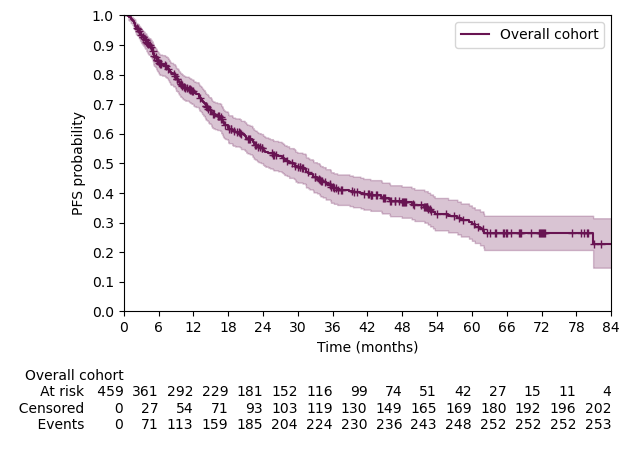

In [6]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt

# Initialize KM fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=data["PFS"], event_observed=data["PD"], label="Overall cohort")

# Plot survival curve
ax = kmf.plot_survival_function(ci_show=True, show_censors = True, censor_styles={'ms': 6}, color = "#681452")   # with confidence interval
plt.xlabel("Time (months)")
plt.ylabel("PFS probability")
plt.title("")

ax.set_xticks(range(0, 90, 6))
ax.set_xlim(0, 84)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)

# Add number at risk table
add_at_risk_counts(kmf, ax=ax)

plt.tight_layout()
plt.savefig("KM_overall.png", format="png", dpi=300)
plt.show()

In [7]:
from lifelines.utils import median_survival_times

# Median survival
median_surv = kmf.median_survival_time_

# 95% CI for median survival
median_ci = median_survival_times(kmf.confidence_interval_)

print(f"Median PFS: {median_surv:.2f} months")
print("95% CI for median survival:")
print(median_ci)

Median PFS: 29.30 months
95% CI for median survival:
     Overall cohort_lower_0.95  Overall cohort_upper_0.95
0.5                       24.0                       33.7


In [8]:
times = [6, 12, 24, 36, 48, 60, 72]

# Survival probabilities
probs = kmf.predict(times)

# Confidence interval dataframe
ci_df = kmf.confidence_interval_

for t, p in zip(times, probs):
    # get last CI estimate before or at time t
    ci_t = ci_df.loc[:t].iloc[-1]

    lower = ci_t.iloc[0]
    upper = ci_t.iloc[1]

    #print(f"{t} months: {p:.3f} "f"(95% CI: {lower:.3f}–{upper:.3f})")

    #save as df wth 3 decimals
results = pd.DataFrame({
    "Time (months)": times,
    "Survival Probability": probs.round(3),
    "Lower 95% CI": [ci_df.loc[:t].iloc[-1].iloc[0].round(3) for t in times],
    "Upper 95% CI": [ci_df.loc[:t].iloc[-1].iloc[1].round(3) for t in times]
})

results


,Time (months),Survival Probability,Lower 95% CI,Upper 95% CI
6,6,0.842,0.804,0.872
12,12,0.740,0.696,0.779
24,24,0.546,0.495,0.594
36,36,0.419,0.367,0.470
48,48,0.369,0.317,0.422
60,60,0.294,0.239,0.352
72,72,0.264,0.208,0.323


## Model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, QuantileTransformer, RobustScaler, FunctionTransformer, MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import numpy as np
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score
import joblib


In [26]:
import pandas as pd
from sksurv.datasets import get_x_y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

# Assuming your DataFrame is called df
# df = your_data

# Define the column names for event and time (PFS and PFS_Months)
attr_labels = ['PD', 'PFS']  # Replace with your actual column names

# Get the features (X) and survival labels (y) using get_x_y
X, y = get_x_y(data, attr_labels, survival=True, pos_label=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1159, stratify=X['ISOLA'])

In [27]:
print(X_train.shape)
print(X_test.shape)

(321, 16)
(138, 16)


In [28]:
# 7. Tag datasets for comparison
X_train["Set"] = "Training"
X_test["Set"] = "Validation"
df = pd.concat([X_train, X_test], axis=0)
df

,ISOLA,Age,Menopausal,Hormone_Resistance_Primary,Hormone_Resistance_Secondary,ER,PgR,HER2,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,Sinc,Set
251,NO,59.652055,1.0,0,0,90.0,25.0,1,35.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,Training
54,SI,77.073973,1.0,1,0,95.0,5.0,0,30.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Training
442,NO,73.046575,1.0,0,0,90.0,70.0,0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Training
449,NO,64.578082,1.0,0,0,90.0,80.0,1,25.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,Training
194,NO,62.032877,1.0,0,0,90.0,60.0,1,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,SI,51.934247,1.0,0,0,85.0,70.0,1,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Validation
276,NO,48.758904,0.0,0,0,90.0,75.0,0,25.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Validation
441,NO,60.572603,1.0,0,0,95.0,75.0,1,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Validation
30,SI,74.638356,1.0,0,0,95.0,95.0,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Validation


In [29]:
# Step 1: Create the combined hormone resistance column
def classify_hormone_resistance(row):
    if row['Hormone_Resistance_Primary'] == 1:
        return "Primary Resistant"
    elif row['Hormone_Resistance_Secondary'] == 1:
        return "Secondary Resistant"
    else:
        return "Hormone Sensitive"

df["Hormone_Resistance_Status"] = df.apply(classify_hormone_resistance, axis=1)

# Step 2: Make it an ordered categorical with consistent labels
df["Hormone_Resistance_Status"] = pd.Categorical(
    df["Hormone_Resistance_Status"],
    categories=["Hormone Sensitive", "Primary Resistant", "Secondary Resistant"],
    ordered=True
)

# Step 3: Drop original columns
df = df.drop(columns=['Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary'])


In [30]:
from tableone import TableOne
import numpy as np

# Replace 'None' strings in categorical variables with missing values
df.replace("None", pd.NA, inplace=True)

# Select all columns excluding the 'Set' column
columns = df.columns.drop("Set").tolist()

# Infer categorical variables (those with ≤ 5 unique values, excluding NaNs)
categorical = ['Histotype', 'Menopausal', 'M_Brain', 'M_Liver', 'M_Bone', 'M_Peritoneal', 'Bone_Only', 'Hormone_Resistance_Status', 'Sinc', 'ISOLA', 'HER2']
nonnormal = ['Age', 'ER', 'PgR', 'Ki67', 'PFS', 'PD']

# Force median [IQR] for all continuous variables by treating all as non-normal
my_table = TableOne(
    df,
    columns=columns,
    categorical=categorical,
    groupby="Set",
    pval=True,
    nonnormal=nonnormal,
    missing=True  # this shows missing data counts
)

# Print the table
print(my_table)

# Save to xlsx
my_table.to_excel("table1.xlsx", index=True)

                                                     Grouped by Set                                                              
                                                            Missing           Overall          Training        Validation P-Value
n                                                                                 459               321               138        
ISOLA, n (%)                     NO                                        359 (78.2)        251 (78.2)        108 (78.3)   1.000
                                 SI                                        100 (21.8)         70 (21.8)         30 (21.7)        
Age, median [Q1,Q3]                                               0  61.8 [52.0,71.0]  61.8 [52.7,70.6]  61.9 [50.5,71.5]   0.893
Menopausal, n (%)                0.0                                       115 (25.1)         74 (23.1)         41 (29.7)   0.314
                                 1.0                                       341 (74.3)     

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxnetSurvivalAnalysis, CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

In [33]:
y_df_train = pd.DataFrame({
    'PD': y_train['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_train['PFS']                 # time to event or censoring
})

y_df_test = pd.DataFrame({
    'PD': y_test['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_test['PFS']                 # time to event or censoring
})

## Combine X_train and y_df_train
X_train_combined = pd.concat([X_train.reset_index(drop=True), y_df_train.reset_index(drop=True)], axis=1)
## Combine X_test and y_df_test
X_test_combined = pd.concat([X_test.reset_index(drop=True), y_df_test.reset_index(drop=True)], axis=1)

# Save the DataFrames to Excel files
X_train_combined.to_excel("train.xlsx", index=False)
X_test_combined.to_excel("test.xlsx", index=False)

In [34]:
# Combine the training and test sets keeping the 'Set' column
combined_df = pd.concat([X_train_combined, X_test_combined], ignore_index=True)
combined_df["Set"] = combined_df["Set"].astype(str)  # Ensure 'Set' is a string type
# Save the combined DataFrame to an Excel file
combined_df.to_excel("combined.xlsx", index=False)
combined_df

,ISOLA,Age,Menopausal,Hormone_Resistance_Primary,Hormone_Resistance_Secondary,ER,PgR,HER2,Ki67,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,Sinc,Set,PD,PFS
0,NO,59.652055,1.0,0,0,90.0,25.0,1,35.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,Training,1,9.4
1,SI,77.073973,1.0,1,0,95.0,5.0,0,30.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Training,1,4.1
2,NO,73.046575,1.0,0,0,90.0,70.0,0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Training,0,30.0
3,NO,64.578082,1.0,0,0,90.0,80.0,1,25.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,Training,0,4.0
4,NO,62.032877,1.0,0,0,90.0,60.0,1,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Training,0,61.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,SI,51.934247,1.0,0,0,85.0,70.0,1,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Validation,0,11.7
455,NO,48.758904,0.0,0,0,90.0,75.0,0,25.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Validation,0,51.8
456,NO,60.572603,1.0,0,0,95.0,75.0,1,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Validation,0,11.5
457,SI,74.638356,1.0,0,0,95.0,95.0,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Validation,0,48.5


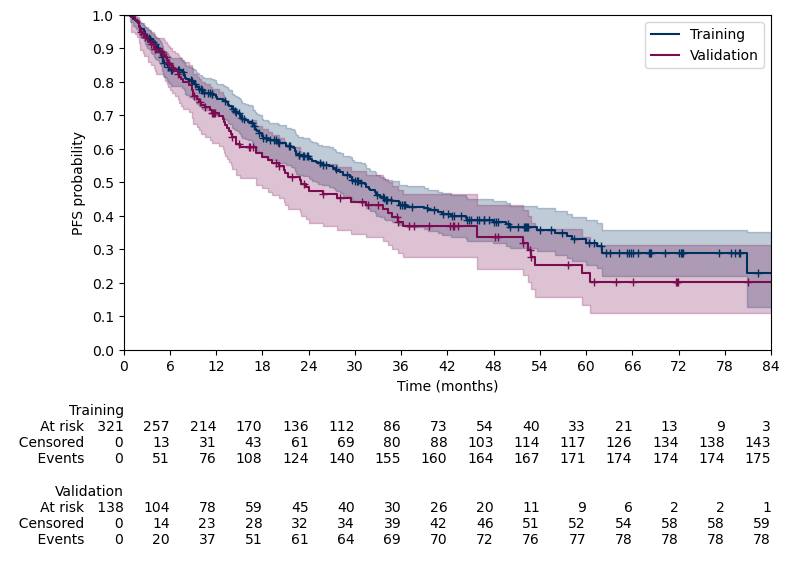

In [35]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt

colors = {
    "Training": "#003060",   # blue
    "Validation": "#7b0c51"        # red
}

kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(8,6))

# Store the fitted KM objects
kmf_list = []

for name, grouped_df in combined_df.groupby("Set"):
    kmf_i = KaplanMeierFitter()
    kmf_i.fit(durations=grouped_df["PFS"], event_observed=grouped_df["PD"], label=name)
    kmf_i.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6}, color=colors[name])
    kmf_list.append(kmf_i)

# Labels
plt.xlabel("Time (months)")
plt.ylabel("PFS probability")
plt.title("")

ax.set_xticks(range(0, 90, 6))
ax.set_xlim(0, 84)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)

# Add a single risk table with both groups
add_at_risk_counts(*kmf_list, ax=ax)

plt.tight_layout()
plt.savefig("KM_Set.png", format="png", dpi=300)
plt.show()

In [36]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times

results = []

for name, grouped_df in combined_df.groupby("Set"):
    kmf = KaplanMeierFitter()
    kmf.fit(durations=grouped_df["PFS"], event_observed=grouped_df["PD"], label=name)

    # Median survival
    median_surv = kmf.median_survival_time_
    # 95% CI for the median
    median_ci = median_survival_times(kmf.confidence_interval_)
    
    # Number of events
    n_events = grouped_df["PD"].sum()
    n_total = len(grouped_df)

    results.append({
        "Set": name,
        "Median PFS (months)": round(median_surv, 2) if median_surv is not None else "Not reached",
        "95% CI lower": round(median_ci.iloc[0,0], 2) if not median_ci.empty else None,
        "95% CI upper": round(median_ci.iloc[0,1], 2) if not median_ci.empty else None,
        "N events": int(n_events),
        "N total": int(n_total)
    })

summary_df = pd.DataFrame(results)
summary_df


,Set,Median PFS (months),95% CI lower,95% CI upper,N events,N total
0,Training,30.8,25.2,35.7,175,321
1,Validation,23.0,17.2,34.8,78,138


In [37]:
from lifelines.statistics import logrank_test

# Split data
train_df = combined_df[combined_df["Set"] == "Training"]
valid_df = combined_df[combined_df["Set"] == "Validation"]

# Perform log-rank test
results = logrank_test(
    train_df["PFS"], valid_df["PFS"], 
    event_observed_A=train_df["PD"], 
    event_observed_B=valid_df["PD"]
)

print("Log-rank test p-value:", results.p_value)


Log-rank test p-value: 0.1712781843796427


# Training

### Coxnet

In [38]:
# Prop the isola column
X_train = X_train.drop(columns=['ISOLA', 'Set'])
X_test = X_test.drop(columns=['ISOLA', 'Set'])

In [39]:
# 1. Define separate transformers for each data type
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = SimpleImputer(strategy='most_frequent')

num_cols = ['Age','ER', 'PgR', 'Ki67']
cat_cols = ['Menopausal', 'Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary', 
            'HER2', 'Histotype', 'M_Brain', 'M_Liver', 'M_Bone', 'M_Peritoneal', 'Bone_Only', 'Sinc']

# 2. Bundle them in a ColumnTransformer
# Replace 'num_cols' and 'cat_cols' with your actual column names/indices
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                 ['Age', 'ER', 'PgR', 'Ki67']),
                                ('cat', SimpleImputer(strategy='most_frequent'),
                                 ['Menopausal', 'Hormone_Resistance_Primary',
                                  'Hormone_Resistance_Secondary', 'HER2',
                                  'Histotype', 'M_Brain', 'M_Liver', 'M_Bone',
                                  'M_Peritoneal', 'Bone_Only', 'Sinc'])])

In [40]:
# Assign feature names to the index
feature_names = num_cols + cat_cols
feature_names

['Age',
 'ER',
 'PgR',
 'Ki67',
 'Menopausal',
 'Hormone_Resistance_Primary',
 'Hormone_Resistance_Secondary',
 'HER2',
 'Histotype',
 'M_Brain',
 'M_Liver',
 'M_Bone',
 'M_Peritoneal',
 'Bone_Only',
 'Sinc']

In [41]:
# Create a pipeline with standardization and CoxnetSurvivalAnalysis
coxnet_pipe = make_pipeline(
    preprocessor,
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
)

# Fit the pipeline to estimate alphas
coxnet_pipe.fit(X_train, y_train)

# Retrieve the estimated alphas
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_


In [42]:
# Set random seed for reproducibility
np.random.seed(42)

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Set up the grid search over the estimated alphas
gcv = GridSearchCV(
    make_pipeline(preprocessor, 
                  StandardScaler(), 
                  CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=-1
)

# Fit the grid search
gcv.fit(X_train, y_train)

# Retrieve cross-validation results
cv_results = pd.DataFrame(gcv.cv_results_)

In [ ]:
#cv_results.to_excel("cv_results.xlsx", index=False)

In [43]:
gcv.best_params_["coxnetsurvivalanalysis__alphas"][0]

0.016803176364768267

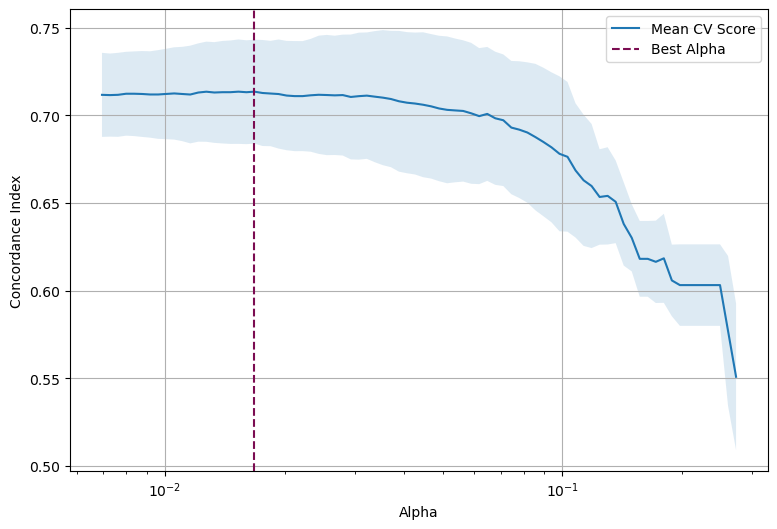

In [44]:
# Extract alpha values and corresponding mean and std of test scores
alphas = cv_results["param_coxnetsurvivalanalysis__alphas"].apply(lambda x: x[0])
mean_scores = cv_results["mean_test_score"]
std_scores = cv_results["std_test_score"]

# Plot the mean test score with standard deviation
plt.figure(figsize=(9, 6))
plt.plot(alphas, mean_scores, label='Mean CV Score')
plt.fill_between(alphas, mean_scores - std_scores, mean_scores + std_scores, alpha=0.15)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Concordance Index")
plt.title("")
plt.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], color="#7b0c51", linestyle="--", label="Best Alpha")
plt.legend()
plt.grid(True)

plt.savefig("CV.png", format="png", dpi=300)
plt.show()

In [45]:
nicer_feature_names = ['Age',
                       'ER',
                       'PgR',
                       'Ki67',
                       'Menopausal Status',
                       'Primary Hormone Resistance',
                       'Secondary Hormone Resistance',
                       'HER2 Status',
                       'Histotype',
                       'Brain Metastases',
                       'Liver Metastases',
                       'Bone Metastases',
                       'Peritoneal Metastases',
                       'Bone Only Disease',
                       'Synchronous']
nicer_feature_names

['Age',
 'ER',
 'PgR',
 'Ki67',
 'Menopausal Status',
 'Primary Hormone Resistance',
 'Secondary Hormone Resistance',
 'HER2 Status',
 'Histotype',
 'Brain Metastases',
 'Liver Metastases',
 'Bone Metastases',
 'Peritoneal Metastases',
 'Bone Only Disease',
 'Synchronous']

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define alphas for the path
alphas = 10.0 ** np.linspace(-2, 0, 100)

# Create pipeline (Imputer + Scaler + Coxnet)
pipeline = make_pipeline(
    preprocessor,
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=1.0)  # Lasso path
)

# Preprocess features once to avoid re-imputing/scaling in the loop
Xt = pipeline[:-1].fit_transform(X_train)

coefficients = {}

for alpha in alphas:
    model = CoxnetSurvivalAnalysis(l1_ratio=1.0, alphas=[alpha])
    model.fit(Xt, y_train)

    # Flatten coefficients to 1D
    coef_vector = model.coef_.ravel()
    coefficients[round(alpha, 5)] = coef_vector

# Build the DataFrame AFTER collecting coefficients
coefficients = pd.DataFrame.from_dict(coefficients, orient="columns")

coefficients.index = nicer_feature_names
coefficients

,0.01000,0.01048,0.01097,0.01150,0.01205,0.01262,0.01322,0.01385,0.01451,0.01520,...,0.65793,0.68926,0.72208,0.75646,0.79248,0.83022,0.86975,0.91116,0.95455,1.00000
Age,0.161634,0.160300,0.158901,0.157437,0.155903,0.154297,0.152614,0.150852,0.149006,0.147073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ER,-0.035039,-0.034403,-0.033735,-0.033036,-0.032303,-0.031535,-0.030729,-0.029885,-0.029000,-0.028072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PgR,-0.083299,-0.082713,-0.082100,-0.081458,-0.080786,-0.080084,-0.079348,-0.078579,-0.077773,-0.076931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ki67,0.258060,0.256827,0.255535,0.254184,0.252769,0.251288,0.249738,0.248115,0.246417,0.244639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Menopausal Status,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Primary Hormone Resistance,0.226688,0.226057,0.225395,0.224702,0.223976,0.223214,0.222417,0.221580,0.220704,0.219785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Secondary Hormone Resistance,0.178307,0.177083,0.175801,0.174460,0.173056,0.171587,0.170050,0.168441,0.166757,0.164995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HER2 Status,-0.046561,-0.045661,-0.044719,-0.043731,-0.042698,-0.041616,-0.040482,-0.039296,-0.038053,-0.036752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Histotype,0.164245,0.163084,0.161869,0.160598,0.159267,0.157875,0.156419,0.154895,0.153300,0.151632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brain Metastases,0.183346,0.182983,0.182601,0.182199,0.181775,0.181328,0.180857,0.180361,0.179837,0.179284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


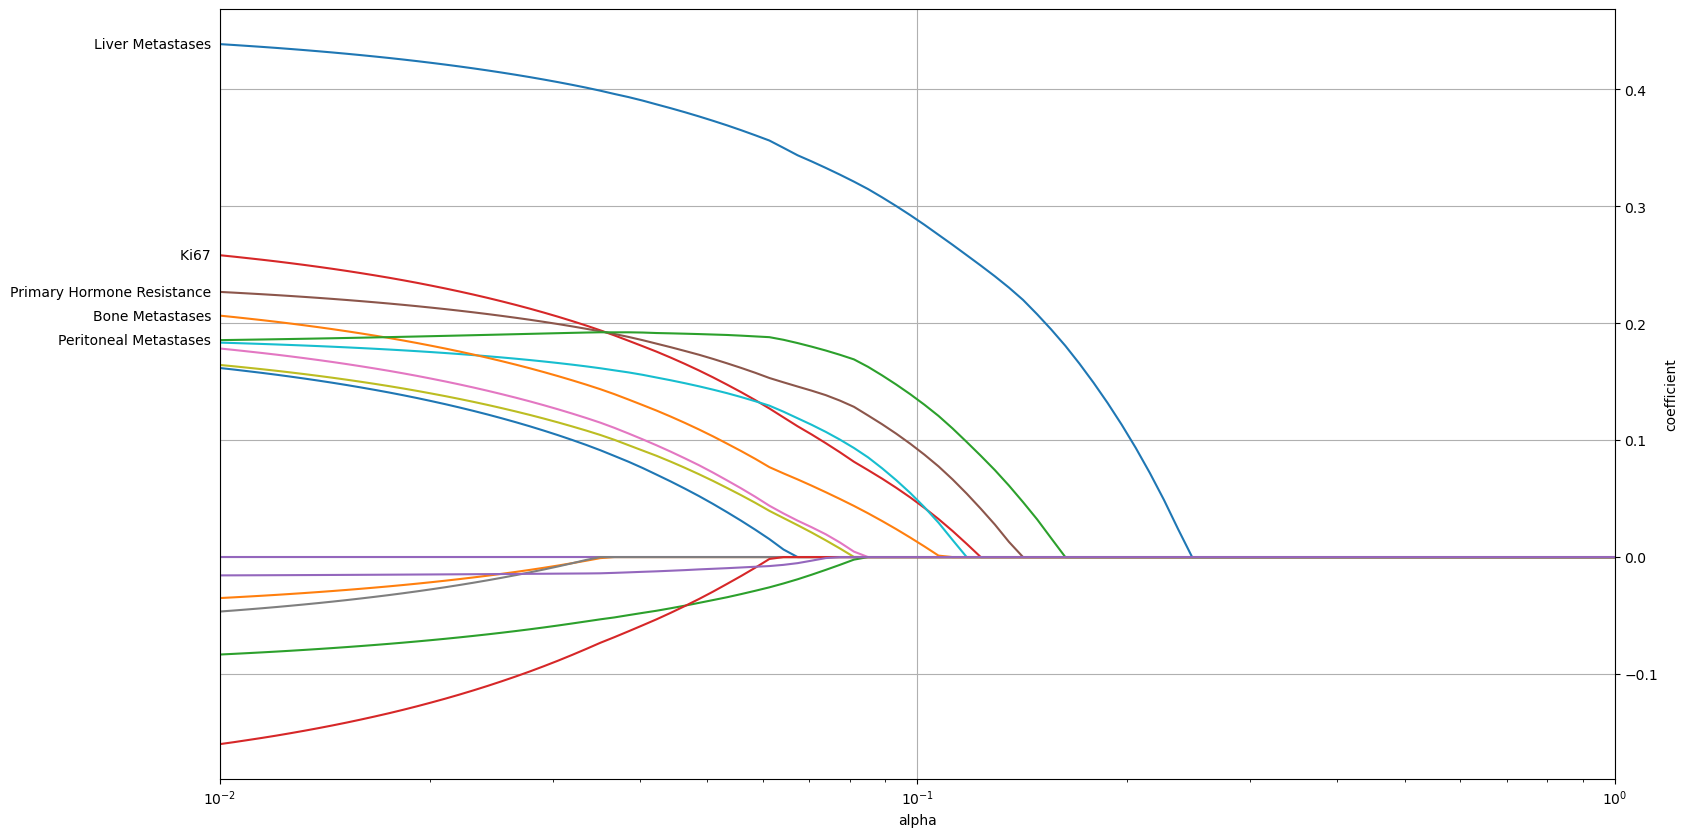

In [31]:
# Plotting Function
def plot_coefficients(coefs, n_highlight=5):
    _, ax = plt.subplots(figsize=(18, 10))
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], "-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(alpha_min, coef, name + "  ", horizontalalignment="right", verticalalignment="center")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_xlim(left=alphas.min(), right=alphas.max())
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")
    ax.set_title("")
    plt.savefig("Reg_path.png", format="png", dpi=300)
    plt.show()

# Call the plot function
plot_coefficients(coefficients, n_highlight=5)

In [32]:
# Build final pipeline with best alpha found
final_model = make_pipeline(
    preprocessor,
    StandardScaler(),
    CoxnetSurvivalAnalysis(
        l1_ratio=0.9,
        alphas=gcv.best_params_["coxnetsurvivalanalysis__alphas"],
        fit_baseline_model=True  # <<< REQUIRED FOR PREDICTING SURVIVAL FUNCTIONS
    )
)

# Fit on full training data
final_model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'ER', 'PgR', 'Ki67']),
                                                 ('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Menopausal',
                                                   'Hormone_Resistance_Primary',
                                                   'Hormone_Resistance_Secondary',
                                                   'HER2', 'Histotype',
                                                   'M_Brain', 'M_Liver',
                                                   'M_Bone', 'M_Peritoneal',
                                                   'Bone_Only', 'Sinc'])])),
                ('standardscaler', StandardScaler()),
          

In [33]:
cox_model = final_model

In [34]:
import joblib
joblib.dump(cox_model, 'coxnet_model.joblib')

['coxnet_model.joblib']

In [36]:
cox_model = joblib.load('coxnet_model.joblib')

In [37]:
# Extract the Coxnet model from the pipeline
coxnet_model = cox_model.named_steps["coxnetsurvivalanalysis"]

# Retrieve coefficients as a flat array
best_coefs = coxnet_model.coef_.ravel()

# Create DataFrame for plotting
coef_df = pd.DataFrame({
    "feature": nicer_feature_names,
    "coefficient": best_coefs
}).sort_values("coefficient", key=lambda x: abs(x), ascending=False)

coef_df

,feature,coefficient
10,Liver Metastases,0.429062
3,Ki67,0.243889
5,Primary Hormone Resistance,0.219141
11,Bone Metastases,0.192557
12,Peritoneal Metastases,0.187148
9,Brain Metastases,0.178933
6,Secondary Hormone Resistance,0.164000
8,Histotype,0.151191
0,Age,0.146215
13,Bone Only Disease,-0.141172


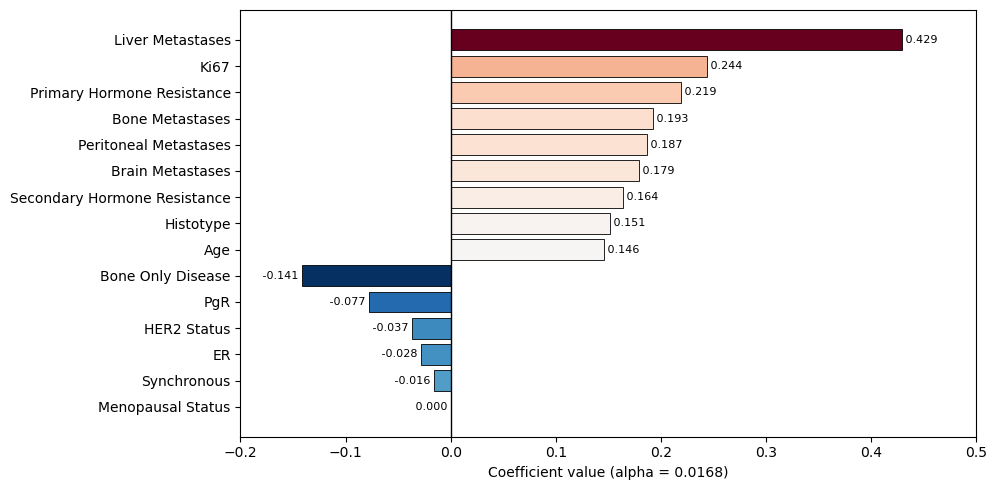

In [328]:
# Plot
plt.figure(figsize=(10, 5))

# Normalizzazione dei coefficienti per la colormap
norm = (
    (coef_df["coefficient"] - coef_df["coefficient"].min()) /
    (coef_df["coefficient"].max() - coef_df["coefficient"].min())
)

colors = sns.color_palette("RdBu_r", as_cmap=True)(norm)
#RdBu
#PiYG_r
plt.barh(
    coef_df["feature"],
    coef_df["coefficient"],
    color=colors,
    edgecolor="black",
    linewidth=0.6
)

plt.xlabel(
    f"Coefficient value (alpha = {gcv.best_params_['coxnetsurvivalanalysis__alphas'][0]:.4f})"
)
plt.title("")
plt.axvline(0, color="black", linewidth=1)

# Aggiunta valori numerici
for index, value in enumerate(coef_df["coefficient"]):
    plt.text(
        value,
        index,
        f" {value:.3f} ",
        va="center",
        ha="left" if value > 0 else "right",
        fontsize=8
    )

plt.gca().invert_yaxis()
plt.grid(False)
plt.tight_layout()
plt.xlim(-0.2, 0.5)

plt.savefig("Coef_Coxnet.svg", format="svg")
plt.show()

In [ ]:
# Save as Excel
coef_df.round(3).to_excel("coef_df.xlsx", index=False)

#### Performance

In [37]:
c_index = cox_model.score(X_train, y_train)
print(f"Train Concordance Index: {c_index:.2f}")

Train Concordance Index: 0.73


In [38]:
c_index = cox_model.score(X_test, y_test)
print(f"Test Concordance Index: {c_index:.2f}")

Test Concordance Index: 0.74


In [39]:
import numpy as np
from sklearn.utils import resample

n_bootstraps = 1000
rng = np.random.default_rng(42)  # for reproducibility

In [40]:
c_indices = []

for i in range(n_bootstraps):
    # Bootstrap sample
    X_resampled, y_resampled = resample(X_test, y_test, replace=True, random_state=rng.integers(0, 1e6))
    
    # Compute C-index
    c_index = cox_model.score(X_resampled, y_resampled)
    c_indices.append(c_index)

c_indices = np.array(c_indices)

# Point estimate from original test set
c_index_point = cox_model.score(X_test, y_test)
# 95% CI from percentiles
ci_lower, ci_upper = np.percentile(c_indices, [2.5, 97.5])

print(f"Test Concordance Index: {c_index_point:.2f} (95% CI: {ci_lower:.2f} – {ci_upper:.2f})")

Test Concordance Index: 0.74 (95% CI: 0.67 – 0.80)


In [41]:
from sksurv.metrics import concordance_index_ipcw
uno_c = concordance_index_ipcw(y_train, y_test, cox_model.predict(X_test))[0]
print(f"Test Uno-C Index: {uno_c:.2f}")

Test Uno-C Index: 0.72


In [42]:
c_indices_uno = []

for i in range(n_bootstraps):
    # Bootstrap sample
    X_resampled, y_resampled = resample(X_test, y_test, replace=True, random_state=rng.integers(0, 1e6))
    
    # Compute C-index
    uno_c = concordance_index_ipcw(y_train, y_resampled, cox_model.predict(X_resampled))[0]
    c_indices_uno.append(uno_c)

c_indices_uno = np.array(c_indices_uno)

# Point estimate from original test set
uno_c = concordance_index_ipcw(y_train, y_test, cox_model.predict(X_test))[0]
ci_lower_uno, ci_upper_uno = np.percentile(c_indices_uno, [2.5, 97.5])

print(f"Test Uno-C Index: {uno_c:.2f} (95% CI: {ci_lower_uno:.2f} – {ci_upper_uno:.2f})")

Test Uno-C Index: 0.72 (95% CI: 0.65 – 0.78)


In [43]:
summary = pd.DataFrame({
    "Metric": ["Harrell C Index", "Uno C Index"],
    "Estimate": [c_index_point, uno_c],
    "CI_lower": [ci_lower, ci_lower_uno],
    "CI_upper": [ci_upper, ci_upper_uno]
})
summary

,Metric,Estimate,CI_lower,CI_upper
0,Harrell C Index,0.738736,0.670932,0.800205
1,Uno C Index,0.716736,0.653088,0.780647


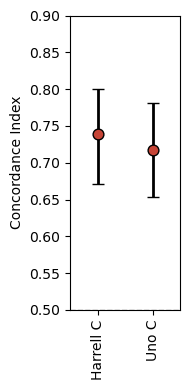

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["Harrell C", "Uno C"]
estimates = [c_index_point, uno_c]
ci_lowers = [ci_lower, ci_lower_uno]
ci_uppers = [ci_upper, ci_upper_uno]

x = np.arange(len(labels))  # [0, 1]

plt.figure(figsize=(2, 4))
plt.scatter(labels, estimates, color="#c64436", edgecolors="black", zorder=3, s = 60)
plt.errorbar(
    x,
    estimates,
    yerr=np.array([
        np.array(estimates) - np.array(ci_lowers),
        np.array(ci_uppers) - np.array(estimates)
    ]),
    fmt="o",
    color="black",
    capsize=4,
    linewidth=2
)

# --- CENTERING FIX ---
plt.xlim(-0.5, len(labels) - 0.5)
plt.xticks(x, labels, rotation=90)

plt.ylabel("Concordance Index")
plt.ylim(0.5, 0.9)
plt.axhline(0.5, linestyle="--", color="gray", linewidth=1)

plt.tight_layout()
plt.savefig("Coxnet_C.svg", format="svg")
plt.show()

In [45]:
from sksurv.metrics import brier_score
from sksurv.metrics import integrated_brier_score

In [46]:
time_point = [6]

survs = cox_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = cox_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [6] months: 0.102
Brier score at [6] months: 0.102 (95% CI: 0.067 – 0.140)


In [47]:
time_point = [12]

survs = cox_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = cox_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [12] months: 0.149
Brier score at [12] months: 0.149 (95% CI: 0.112 – 0.184)


In [167]:
time_point = [24]

survs = cox_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = cox_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [24] months: 0.183
Brier score at [24] months: 0.183 (95% CI: 0.149 – 0.222)


In [168]:
time_point = [36]

survs = cox_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = cox_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [36] months: 0.169
Brier score at [36] months: 0.169 (95% CI: 0.130 – 0.208)


In [175]:
time_point = [48]

survs = cox_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = cox_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [48] months: 0.177
Brier score at [48] months: 0.177 (95% CI: 0.126 – 0.235)


In [169]:
time_point = [60]

survs = cox_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = cox_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [60] months: 0.138
Brier score at [60] months: 0.138 (95% CI: 0.088 – 0.198)


In [48]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sksurv.metrics import brier_score

time_points = np.arange(6, 61, 6)

results = []

# Precompute survival functions on original test set
survs_test = cox_model.predict_survival_function(X_test)

for t in time_points:
    # ---- Point estimate ----
    preds = np.array([[fn(t)] for fn in survs_test])

    _, score = brier_score(
        y_train,
        y_test,
        preds,
        times=[t]
    )

    brier_t = score[0]

    # ---- Bootstrap ----
    brier_boot = []

    for i in range(n_bootstraps):
        X_res, y_res = resample(
            X_test, y_test,
            replace=True,
            random_state=rng.integers(0, 1e6)
        )

        survs_res = cox_model.predict_survival_function(X_res)
        preds_res = np.array([[fn(t)] for fn in survs_res])

        _, score_res = brier_score(
            y_train,
            y_res,
            preds_res,
            times=[t]
        )

        brier_boot.append(score_res[0])

    ci_lower, ci_upper = np.percentile(brier_boot, [2.5, 97.5])

    # ---- Store ----
    results.append({
        "time": t,
        "Estimate": brier_t,
        "CI_lower": ci_lower,
        "CI_upper": ci_upper
    })

In [51]:
# Final DataFrame
df_brier = pd.DataFrame(results)
df_brier

,time,Estimate,CI_lower,CI_upper
0,6,0.101880,0.067942,0.140542
1,12,0.149192,0.113795,0.185865
2,18,0.160516,0.132073,0.196200
3,24,0.182892,0.150456,0.221114
4,30,0.181195,0.145231,0.219208
5,36,0.168941,0.131262,0.210895
6,42,0.165788,0.127506,0.207062
7,48,0.177326,0.126322,0.232787
8,54,0.163200,0.109376,0.226167
9,60,0.138179,0.093361,0.202401


In [52]:
df_brier.to_excel("brier_scores_cox.xlsx", index=False)

In [53]:
times = np.arange(1, 61)
preds = np.asarray([[fn(t) for t in times] for fn in survs])

score = integrated_brier_score(y_train, y_test, preds, times)
print(f"IBS ({times[0]}–{times[-1]} months): {score:.3f}")

IBS (1–60 months): 0.155


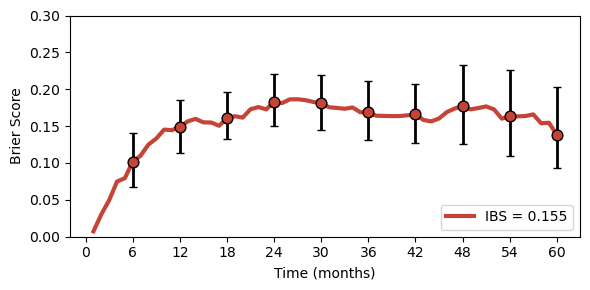

In [54]:
yerr_brier = np.vstack([
    df_brier["Estimate"] - df_brier["CI_lower"],
    df_brier["CI_upper"] - df_brier["Estimate"]
])

times_b, score_b = brier_score(y_train, y_test, preds, times)

plt.figure(figsize=(6, 3))

plt.plot(times_b, score_b, linestyle='-', linewidth=3, color="#c64436", label=f"IBS = {score:.3f}")
plt.scatter(df_brier["time"], df_brier["Estimate"], color="#c64436", edgecolors="black", zorder=3, s = 60)

plt.errorbar(
    df_brier["time"],
    df_brier["Estimate"],
    yerr=yerr_brier,
    fmt="o",
    color="black",
    capsize=3,
    markersize=6,
    linewidth=2,
)

# Axes
plt.xlabel("Time (months)")
plt.ylabel("Brier Score")
plt.xticks(range(0, 61, 6))
plt.ylim(0, 0.3)

plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("Coxnet_Brier.svg", format="svg")
plt.show()

In [55]:
from sksurv.metrics import cumulative_dynamic_auc
va_times = np.arange(6, 66, 6)
cph_risk_scores = cox_model.predict(X_test)
cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, cph_risk_scores, va_times)

print(f"mean AUC: {cph_mean_auc:.3f}")

mean AUC: 0.776


In [56]:
from sklearn.utils import resample
import numpy as np
from sksurv.metrics import cumulative_dynamic_auc

va_times = np.arange(6, 66, 6)
risk_scores = cox_model.predict(X_test)

# Point estimate
auc_t, mean_auc = cumulative_dynamic_auc(
    y_train, y_test, risk_scores, va_times
)

# Bootstrap
mean_auc_boot = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    risk_res = cox_model.predict(X_res)

    _, mean_auc_res = cumulative_dynamic_auc(
        y_train, y_res, risk_res, va_times
    )

    mean_auc_boot.append(mean_auc_res)

mean_auc_boot = np.array(mean_auc_boot)
ci_lower, ci_upper = np.percentile(mean_auc_boot, [2.5, 97.5])

print(
    f"Mean AUC (6-60 months): {mean_auc:.3f} "
    f"(95% CI: {ci_lower:.3f}–{ci_upper:.3f})"
)


Mean AUC (6-60 months): 0.776 (95% CI: 0.691–0.848)


In [57]:
auc_boot = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    risk_res = cox_model.predict(X_res)

    auc_t_res, _ = cumulative_dynamic_auc(
        y_train, y_res, risk_res, va_times
    )

    auc_boot.append(auc_t_res)

auc_boot = np.array(auc_boot)  # shape: (B, len(va_times))

auc_lower = np.percentile(auc_boot, 2.5, axis=0)
auc_upper = np.percentile(auc_boot, 97.5, axis=0)


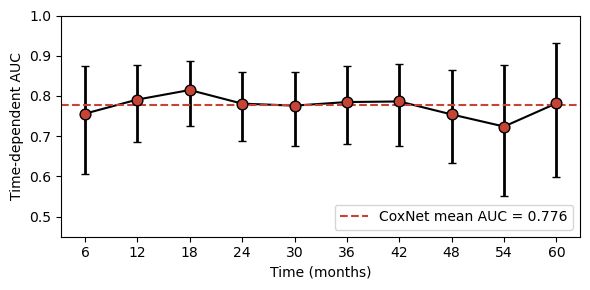

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Error bars (asymmetric)
yerr = np.vstack([
    auc_t - auc_lower,
    auc_upper - auc_t
])

plt.figure(figsize=(6, 3))

plt.errorbar(
    va_times,
    auc_t,
    yerr=yerr,
    fmt="o",
    capsize=3,
    linewidth=2, color = "black",
    markersize=6
)
plt.scatter(va_times, auc_t, color="#c64436", edgecolors="black", zorder=3, s = 60)
plt.plot(va_times, auc_t, marker="", linestyle='-', color = "black", zorder = 2 )
plt.axhline(cph_mean_auc, linestyle="--", color = "#c64436", label=f"CoxNet mean AUC = {mean_auc:.3f}")

plt.xlabel("Time (months)")
plt.ylabel("Time-dependent AUC")
plt.ylim(0.45, 1.0)
plt.xticks(va_times)
plt.legend(loc="lower right")
plt.tight_layout()

plt.savefig("Coxnet_AUC.svg", format="svg")
plt.show()

### GBM

In [46]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the pipeline
pipeline = make_pipeline(
    preprocessor,
    StandardScaler(),
    GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0)
)

# Set up the grid search over n_estimators
gcv = GridSearchCV(
    estimator=pipeline,
    param_grid={"gradientboostingsurvivalanalysis__n_estimators": np.arange(1, 100, 1)},
    cv=cv,
    error_score=0.5,
    n_jobs=-1
)

# Fit the grid search
gcv.fit(X_train, y_train)

# Retrieve cross-validation results
cv_results = pd.DataFrame(gcv.cv_results_)

In [40]:
cv_results.to_excel("cv_results_GBM.xlsx", index=False)

In [47]:
# Build final pipeline with best alpha found
final_model = make_pipeline(
    preprocessor,
    StandardScaler(),
    GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0,
        n_estimators=gcv.best_params_["gradientboostingsurvivalanalysis__n_estimators"]
    )
)

# Fit on full training data
final_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'ER', 'PgR', 'Ki67']),
                                                 ('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Menopausal',
                                                   'Hormone_Resistance_Primary',
                                                   'Hormone_Resistance_Secondary',
                                                   'HER2', 'Histotype',
                                                   'M_Brain', 'M_Liver',
                                                   'M_Bone', 'M_Peritoneal',
                                                   'Bone_Only', 'Sinc'])])),
                ('standardscaler', StandardScaler()),
          

In [48]:
gbm_model = final_model

In [43]:
import joblib
joblib.dump(final_model, 'gbm_model.joblib')

['gbm_model.joblib']

In [49]:
import joblib
gbm_model = joblib.load('gbm_model.joblib')

#### Performance

In [50]:
c_index = gbm_model.score(X_train, y_train)
print(f"Train Concordance Index: {c_index:.2f}")

Train Concordance Index: 0.74


In [51]:
c_index = gbm_model.score(X_test, y_test)
print(f"Test Concordance Index: {c_index:.2f}")

Test Concordance Index: 0.74


In [67]:
import numpy as np
from sklearn.utils import resample

n_bootstraps = 1000
rng = np.random.default_rng(42)  # for reproducibility

In [68]:
c_indices = []

for i in range(n_bootstraps):
    # Bootstrap sample
    X_resampled, y_resampled = resample(X_test, y_test, replace=True, random_state=rng.integers(0, 1e6))
    
    # Compute C-index
    c_index = gbm_model.score(X_resampled, y_resampled)
    c_indices.append(c_index)

c_indices = np.array(c_indices)

# Point estimate from original test set
c_index_point = gbm_model.score(X_test, y_test)
# 95% CI from percentiles
ci_lower, ci_upper = np.percentile(c_indices, [2.5, 97.5])

print(f"Test Concordance Index: {c_index_point:.2f} (95% CI: {ci_lower:.2f} – {ci_upper:.2f})")

Test Concordance Index: 0.74 (95% CI: 0.67 – 0.80)


In [69]:
from sksurv.metrics import concordance_index_ipcw
uno_c = concordance_index_ipcw(y_train, y_test, gbm_model.predict(X_test))[0]
print(f"Test Uno-C Index: {uno_c:.2f}")

Test Uno-C Index: 0.72


In [70]:
c_indices_uno = []

for i in range(n_bootstraps):
    # Bootstrap sample
    X_resampled, y_resampled = resample(X_test, y_test, replace=True, random_state=rng.integers(0, 1e6))
    
    # Compute C-index
    uno_c = concordance_index_ipcw(y_train, y_resampled, gbm_model.predict(X_resampled))[0]
    c_indices_uno.append(uno_c)

c_indices_uno = np.array(c_indices_uno)

# Point estimate from original test set
uno_c = concordance_index_ipcw(y_train, y_test, gbm_model.predict(X_test))[0]
ci_lower_uno, ci_upper_uno = np.percentile(c_indices_uno, [2.5, 97.5])

print(f"Test Uno-C Index: {uno_c:.2f} (95% CI: {ci_lower_uno:.2f} – {ci_upper_uno:.2f})")

Test Uno-C Index: 0.72 (95% CI: 0.65 – 0.78)


In [71]:
summary = pd.DataFrame({
    "Metric": ["Harrell C Index", "Uno C Index"],
    "Estimate": [c_index_point, uno_c],
    "CI_lower": [ci_lower, ci_lower_uno],
    "CI_upper": [ci_upper, ci_upper_uno]
})
summary

,Metric,Estimate,CI_lower,CI_upper
0,Harrell C Index,0.741426,0.671339,0.802371
1,Uno C Index,0.715075,0.648643,0.776700


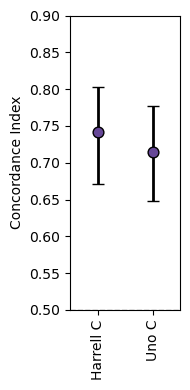

In [72]:
labels = ["Harrell C", "Uno C"]
estimates = [c_index_point, uno_c]
ci_lowers = [ci_lower, ci_lower_uno]
ci_uppers = [ci_upper, ci_upper_uno]

x = np.arange(len(labels))  # [0, 1]

plt.figure(figsize=(2, 4))
plt.scatter(labels, estimates, color="#664797", edgecolors="black", zorder=3, s = 60)
plt.errorbar(
    x,
    estimates,
    yerr=np.array([
        np.array(estimates) - np.array(ci_lowers),
        np.array(ci_uppers) - np.array(estimates)
    ]),
    fmt="o",
    color="black",
    capsize=4,
    linewidth=2
)

# --- CENTERING FIX ---
plt.xlim(-0.5, len(labels) - 0.5)
plt.xticks(x, labels, rotation=90)

plt.ylabel("Concordance Index")
plt.ylim(0.5, 0.9)
plt.axhline(0.5, linestyle="--", color="gray", linewidth=1)

plt.tight_layout()
plt.savefig("GBM_C.svg", format="svg")
plt.show()

In [73]:
time_point = [6]

survs = gbm_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = gbm_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [6] months: 0.105
Brier score at [6] months: 0.105 (95% CI: 0.072 – 0.143)


In [74]:
time_point = [12]

survs = gbm_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = gbm_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [12] months: 0.150
Brier score at [12] months: 0.150 (95% CI: 0.116 – 0.183)


In [75]:
time_point = [24]

survs = gbm_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = gbm_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [24] months: 0.191
Brier score at [24] months: 0.191 (95% CI: 0.160 – 0.225)


In [76]:
time_point = [36]

survs = gbm_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = gbm_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [36] months: 0.182
Brier score at [36] months: 0.182 (95% CI: 0.143 – 0.221)


In [77]:
time_point = [48]

survs = gbm_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = gbm_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [48] months: 0.192
Brier score at [48] months: 0.192 (95% CI: 0.138 – 0.248)


In [78]:
time_point = [60]

survs = gbm_model.predict_survival_function(X_test)
# Survival probabilities at time
preds = np.array([[fn(time_point)] for fn in survs])

times, score = brier_score(y_train, y_test, preds, times=[time_point])
print(f"Brier score at {time_point} months: {score[0]:.3f}")

#Bootstrap
brier_scores = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    survs_res = gbm_model.predict_survival_function(X_res)
    preds_res = np.array([[fn(time_point)] for fn in survs_res])

    _, score_res = brier_score(
        y_train,
        y_res,
        preds_res,
        times=[time_point]
    )

    brier_scores.append(score_res[0])

brier_scores = np.array(brier_scores)
ci_lower, ci_upper = np.percentile(brier_scores, [2.5, 97.5])

print(f"Brier score at {time_point} months: {score[0]:.3f} (95% CI: {ci_lower:.3f} – {ci_upper:.3f})")

Brier score at [60] months: 0.141
Brier score at [60] months: 0.141 (95% CI: 0.091 – 0.196)


In [79]:
time_points = np.arange(6, 61, 6)

results = []
# Precompute survival functions on original test set
survs_test = gbm_model.predict_survival_function(X_test)

for t in time_points:
    # ---- Point estimate ----
    preds = np.array([[fn(t)] for fn in survs_test])

    _, score = brier_score(
        y_train,
        y_test,
        preds,
        times=[t]
    )

    brier_t = score[0]

    # ---- Bootstrap ----
    brier_boot = []

    for i in range(n_bootstraps):
        X_res, y_res = resample(
            X_test, y_test,
            replace=True,
            random_state=rng.integers(0, 1e6)
        )

        survs_res = gbm_model.predict_survival_function(X_res)
        preds_res = np.array([[fn(t)] for fn in survs_res])

        _, score_res = brier_score(
            y_train,
            y_res,
            preds_res,
            times=[t]
        )

        brier_boot.append(score_res[0])

    ci_lower, ci_upper = np.percentile(brier_boot, [2.5, 97.5])

    # ---- Store ----
    results.append({
        "time": t,
        "Estimate": brier_t,
        "CI_lower": ci_lower,
        "CI_upper": ci_upper
    })

In [81]:
# Final DataFrame
df_brier = pd.DataFrame(results)
df_brier

,time,Estimate,CI_lower,CI_upper
0,6,0.104916,0.075099,0.140096
1,12,0.150094,0.117876,0.188155
2,18,0.175211,0.145610,0.206783
3,24,0.191000,0.159807,0.223512
4,30,0.188770,0.155858,0.227949
5,36,0.182037,0.144294,0.222482
6,42,0.177725,0.136741,0.219688
7,48,0.192365,0.138330,0.249700
8,54,0.165573,0.112401,0.224945
9,60,0.140904,0.089610,0.200590


In [82]:
df_brier.to_excel("brier_scores_GBM.xlsx", index=False)

In [83]:
times = np.arange(1, 61)
preds = np.asarray([[fn(t) for t in times] for fn in survs])

score = integrated_brier_score(y_train, y_test, preds, times)
print(f"IBS ({times[0]}–{times[-1]} months): {score:.3f}")

IBS (1–60 months): 0.164


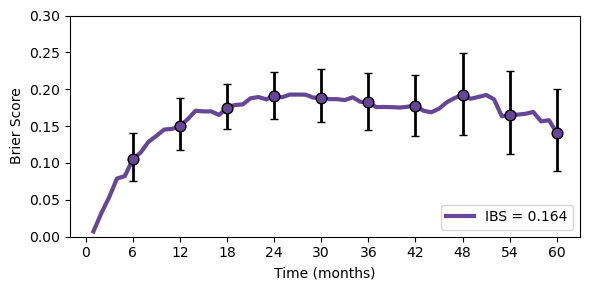

In [84]:
yerr_brier = np.vstack([
    df_brier["Estimate"] - df_brier["CI_lower"],
    df_brier["CI_upper"] - df_brier["Estimate"]
])

times_b, score_b = brier_score(y_train, y_test, preds, times)

plt.figure(figsize=(6, 3))

plt.plot(times_b, score_b, linestyle='-', linewidth=3, color="#664797", label=f"IBS = {score:.3f}")
plt.scatter(df_brier["time"], df_brier["Estimate"], color="#664797", edgecolors="black", zorder=3, s = 60)

plt.errorbar(
    df_brier["time"],
    df_brier["Estimate"],
    yerr=yerr_brier,
    fmt="o",
    color="black",
    capsize=3,
    markersize=6,
    linewidth=2,
)

# Axes
plt.xlabel("Time (months)")
plt.ylabel("Brier Score")
plt.xticks(range(0, 61, 6))
plt.ylim(0, 0.3)

plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("GBM_Brier.svg", format="svg")
plt.show()

In [85]:
va_times = np.arange(6, 66, 6)
cph_risk_scores = gbm_model.predict(X_test)
cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, cph_risk_scores, va_times)

print(f"mean AUC: {cph_mean_auc:.3f}")

mean AUC: 0.771


In [86]:
from sklearn.utils import resample
import numpy as np
from sksurv.metrics import cumulative_dynamic_auc

va_times = np.arange(6, 66, 6)
risk_scores = gbm_model.predict(X_test)

# Point estimate
auc_t, mean_auc = cumulative_dynamic_auc(
    y_train, y_test, risk_scores, va_times
)

# Bootstrap
mean_auc_boot = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    risk_res = gbm_model.predict(X_res)

    _, mean_auc_res = cumulative_dynamic_auc(
        y_train, y_res, risk_res, va_times
    )

    mean_auc_boot.append(mean_auc_res)

mean_auc_boot = np.array(mean_auc_boot)
ci_lower, ci_upper = np.percentile(mean_auc_boot, [2.5, 97.5])

print(
    f"Mean AUC (6-60 months): {mean_auc:.3f} "
    f"(95% CI: {ci_lower:.3f}–{ci_upper:.3f})"
)


Mean AUC (6-60 months): 0.771 (95% CI: 0.687–0.847)


In [87]:
auc_boot = []

for i in range(n_bootstraps):
    X_res, y_res = resample(
        X_test, y_test,
        replace=True,
        random_state=rng.integers(0, 1e6)
    )

    risk_res = gbm_model.predict(X_res)

    auc_t_res, _ = cumulative_dynamic_auc(
        y_train, y_res, risk_res, va_times
    )

    auc_boot.append(auc_t_res)

auc_boot = np.array(auc_boot)  # shape: (B, len(va_times))

auc_lower = np.percentile(auc_boot, 2.5, axis=0)
auc_upper = np.percentile(auc_boot, 97.5, axis=0)


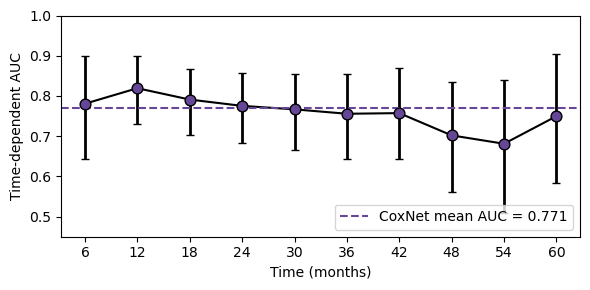

In [88]:
# Error bars (asymmetric)
yerr = np.vstack([
    auc_t - auc_lower,
    auc_upper - auc_t
])

plt.figure(figsize=(6, 3))

plt.errorbar(
    va_times,
    auc_t,
    yerr=yerr,
    fmt="o",
    capsize=3,
    linewidth=2, color = "black",
    markersize=6
)
plt.scatter(va_times, auc_t, color="#664797", edgecolors="black", zorder=3, s = 60)
plt.plot(va_times, auc_t, marker="", linestyle='-', color = "black", zorder = 2 )
plt.axhline(cph_mean_auc, linestyle="--", color = "#664797", label=f"CoxNet mean AUC = {mean_auc:.3f}")

plt.xlabel("Time (months)")
plt.ylabel("Time-dependent AUC")
plt.ylim(0.45, 1.0)
plt.xticks(va_times)
plt.legend(loc="lower right")
plt.tight_layout()

plt.savefig("GBM_AUC.svg", format="svg")
plt.show()

#### Features

In [333]:
coef = pd.Series(gbm_model.named_steps['gradientboostingsurvivalanalysis'].feature_importances_, X_train.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

# Save non-zero coefficients to Excel
coef_nz_df = pd.DataFrame({
    "feature": coef_nz.index,
    "importance": coef_nz.values
}).sort_values("importance", ascending=False)

coef_nz_df.to_excel("coef_nz.xlsx", index=False)

Number of non-zero coefficients: 10


In [334]:
# Rename the variables of the first column
coef_nz.rename(index={'Age': 'Age',
                      'ER': 'ER',
                      'PgR': 'PgR',
                      'Ki67': 'Ki67',
                      'Menopausal': 'Menopausal Status',
                      'Hormone_Resistance_Primary': 'Primary Hormone Resistance',
                      'Hormone_Resistance_Secondary': 'Secondary Hormone Resistance',
                      'HER2': 'HER2 Status',
                      'Histotype': 'Histotype',
                      'M_Brain': 'Brain Metatases',
                      'M_Liver': 'Liver Metatases',
                      'M_Bone': 'Bone Metatases',
                      'M_Peritoneal': 'Peritoneal Metatases',
                      'Bone_Only': 'Bone Only Disease',
                      'Sinc': 'Sincronous'}, inplace=True)
# Order by importance
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_ordered = coef_nz.loc[coef_order]
coef_ordered

Liver Metatases                 0.330156
Peritoneal Metatases            0.149413
Secondary Hormone Resistance    0.147796
PgR                             0.088919
Primary Hormone Resistance      0.079272
Brain Metatases                 0.055170
Age                             0.047749
Bone Metatases                  0.047284
HER2 Status                     0.028205
Histotype                       0.026036
dtype: float64

In [335]:
# Create DataFrame for plotting
coef_ordered_df = pd.DataFrame({
    "feature": coef_ordered.index,
    "coefficient": coef_ordered.values
}).sort_values("coefficient", key=lambda x: abs(x), ascending=False)

coef_ordered_df

,feature,coefficient
0,Liver Metatases,0.330156
1,Peritoneal Metatases,0.149413
2,Secondary Hormone Resistance,0.147796
3,PgR,0.088919
4,Primary Hormone Resistance,0.079272
5,Brain Metatases,0.055170
6,Age,0.047749
7,Bone Metatases,0.047284
8,HER2 Status,0.028205
9,Histotype,0.026036


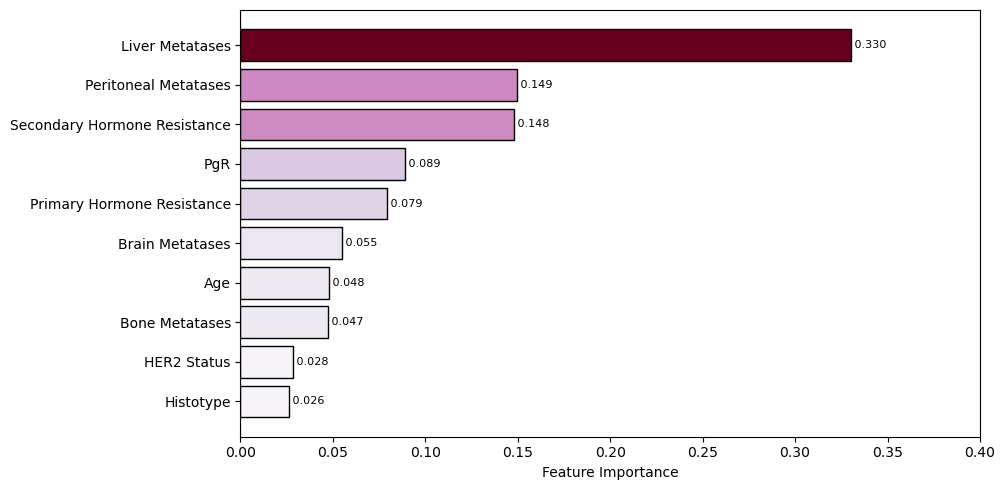

In [336]:
# Plot
plt.figure(figsize=(10, 5))

# Normalizzazione dei coefficienti per la colormap
norm = (
    (coef_ordered_df["coefficient"] - coef_ordered_df["coefficient"].min()) /
    (coef_ordered_df["coefficient"].max() - coef_ordered_df["coefficient"].min())
)

colors = sns.color_palette("PuRd", as_cmap=True)(norm)

plt.barh(
    coef_ordered_df["feature"],
    coef_ordered_df["coefficient"],
    color=colors,
    edgecolor="black",
    linewidth=1
)

plt.xlabel("Feature Importance")

plt.title("")
plt.axvline(0, color="black", linewidth=0.8)

# Aggiunta valori numerici
for index, value in enumerate(coef_ordered_df["coefficient"]):
    plt.text(
        value,
        index,
        f" {value:.3f}",
        va="center",
        ha="left",
        fontsize=8
    )

plt.gca().invert_yaxis()
plt.grid(False)
plt.tight_layout()
plt.xlim(0, 0.4)

plt.savefig("FI_GBM.svg", format="svg")
plt.show()

### Permutation importance comparison

In [349]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Run permutation importance
result_cox = permutation_importance(cox_model, X_test, y_test, n_repeats=30, random_state=1159)

# Build dataframe
perm_df_cox = pd.DataFrame(
    {
        "importances_mean": result_cox["importances_mean"],
        "importances_std": result_cox["importances_std"],
        "model": "CoxNet"
    },
    index=X_test.columns  # match with training features
).sort_values(by="importances_mean", ascending=False)

perm_df_cox

,importances_mean,importances_std,model
M_Liver,0.090333,0.022574,CoxNet
Hormone_Resistance_Primary,0.032963,0.011090,CoxNet
Ki67,0.017317,0.009037,CoxNet
M_Bone,0.013310,0.008694,CoxNet
Age,0.012833,0.006730,CoxNet
Hormone_Resistance_Secondary,0.010743,0.007185,CoxNet
M_Brain,0.009359,0.008235,CoxNet
PgR,0.008092,0.003831,CoxNet
Histotype,0.007386,0.005167,CoxNet
M_Peritoneal,0.004394,0.006933,CoxNet


In [350]:
perm_df_cox.to_excel("coef_perm_cox_test.xlsx", index=True)

In [351]:
# Run permutation importance
result_gbm = permutation_importance(gbm_model, X_test, y_test, n_repeats=30, random_state=1159)

# Build dataframe
perm_df = pd.DataFrame(
    {
        "importances_mean": result_gbm["importances_mean"],
        "importances_std": result_gbm["importances_std"],
        "model": "GBM"
    },
    index=X_train.columns  # match with training features
).sort_values(by="importances_mean", ascending=False)

# Save to Excel
perm_df

,importances_mean,importances_std,model
M_Liver,0.109891,0.022609,GBM
PgR,0.035679,0.008595,GBM
Hormone_Resistance_Primary,0.027401,0.008236,GBM
Ki67,0.022739,0.008872,GBM
M_Bone,0.020284,0.006149,GBM
Age,0.015563,0.008038,GBM
M_Peritoneal,0.014366,0.010579,GBM
Hormone_Resistance_Secondary,0.013957,0.004563,GBM
Histotype,0.011029,0.003676,GBM
M_Brain,0.006927,0.006474,GBM


In [352]:
perm_df.to_excel("coef_perm_gbm_test.xlsx", index=True)

## Model comparison

In [353]:
df_coxnet = perm_df_cox.reset_index().rename(columns={"index": "feature"})
df_gbm = perm_df.reset_index().rename(columns={"index": "feature"})
# Rename the variables of the first column
df_pi = pd.concat([df_coxnet, df_gbm], axis=0, ignore_index=True)

rename_dict = {
    'Age': 'Age',
    'ER': 'ER',
    'PgR': 'PgR',
    'Ki67': 'Ki67',
    'Menopausal': 'Menopausal Status',
    'Hormone_Resistance_Primary': 'Primary Hormone Resistance',
    'Hormone_Resistance_Secondary': 'Secondary Hormone Resistance',
    'HER2': 'HER2 Status',
    'Histotype': 'Histotype',
    'M_Brain': 'Brain Metastases',
    'M_Liver': 'Liver Metastases',
    'M_Bone': 'Bone Metastases',
    'M_Peritoneal': 'Peritoneal Metastases',
    'Bone_Only': 'Bone Only Disease',
    'Sinc': 'Synchronous'
}

df_pi["feature"] = df_pi["feature"].replace(rename_dict)

df_pi

,feature,importances_mean,importances_std,model
0,Liver Metastases,0.090333,0.022574,CoxNet
1,Primary Hormone Resistance,0.032963,0.011090,CoxNet
2,Ki67,0.017317,0.009037,CoxNet
3,Bone Metastases,0.013310,0.008694,CoxNet
4,Age,0.012833,0.006730,CoxNet
5,Secondary Hormone Resistance,0.010743,0.007185,CoxNet
6,Brain Metastases,0.009359,0.008235,CoxNet
7,PgR,0.008092,0.003831,CoxNet
8,Histotype,0.007386,0.005167,CoxNet
9,Peritoneal Metastases,0.004394,0.006933,CoxNet


In [355]:
perm_sorted_idx = result_cox.importances_mean.argsort()
perm_cox_df = result_cox.importances[perm_sorted_idx].T

perm_sorted_idx_gbm = result_gbm.importances_mean.argsort()
perm_gbm_df = result_gbm.importances[perm_sorted_idx_gbm].T

In [356]:
import pandas as pd
import numpy as np

def pi_to_long(result, model_name):
    return pd.DataFrame(
        result.importances.T,
        columns=X_train.columns
    ).melt(
        var_name="feature",
        value_name="importance"
    ).assign(model=model_name)

df_cox_long = pi_to_long(result_cox, "CoxNet")
df_gbm_long = pi_to_long(result_gbm, "GBM")

df_long = pd.concat([df_cox_long, df_gbm_long])
df_long["feature"] = df_long["feature"].replace(rename_dict)

order = (
    df_long.groupby("feature")["importance"]
    .mean()
    .sort_values(ascending=False)
    .index
)

df_long

,feature,importance,model
0,Age,0.015804,CoxNet
1,Age,0.013450,CoxNet
2,Age,0.018325,CoxNet
3,Age,0.007061,CoxNet
4,Age,0.009919,CoxNet
...,...,...,...
445,Synchronous,0.000000,GBM
446,Synchronous,0.000000,GBM
447,Synchronous,0.000000,GBM
448,Synchronous,0.000000,GBM


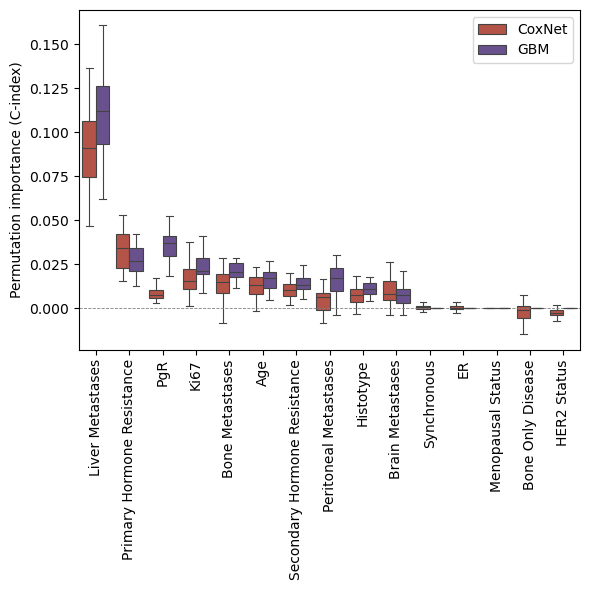

In [357]:
plt.figure(figsize=(6, 6))

sns.boxplot(
    data=df_long,
    x="feature",
    y="importance",
    hue="model", palette=["#c64436", "#664797"],
    order=order, dodge=True,
    width=0.8, linewidth=0.8,
    showfliers=False
)
plt.axhline(0, color="gray", linewidth=0.6, linestyle="--")
plt.ylabel("Permutation importance (C-index)")
plt.xticks(rotation=90, ha="center")
plt.xlabel("")
plt.legend(title="")
plt.tight_layout()

plt.savefig("PI_boxplot_test.svg", format="svg")
plt.show()

## SHAP

In [241]:
import shap 

In [248]:
# Fit ONLY on training data
gbm_model.fit(X_train, y_train)

# separa preprocessing e modello
preprocess = gbm_model.named_steps["columntransformer"]
scaler = gbm_model.named_steps["standardscaler"]
model = gbm_model.named_steps["gradientboostingsurvivalanalysis"]

X_trans_train = preprocess.transform(X_train)
X_trans_train = scaler.transform(X_trans_train)

In [249]:
# Apply preprocessing learned on TRAIN
X_trans_test = preprocess.transform(X_test)
X_trans_test = scaler.transform(X_trans_test)

X_test_ord = pd.DataFrame(
    X_test,
    columns=feature_names
)

X_test_ord['Age'] = X_test_ord['Age'].round(0)

In [250]:
X_test_ord

,Age,ER,PgR,Ki67,Menopausal,Hormone_Resistance_Primary,Hormone_Resistance_Secondary,HER2,Histotype,M_Brain,M_Liver,M_Bone,M_Peritoneal,Bone_Only,Sinc
146,46.0,90.0,90.0,35.0,0.0,0,1,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
318,62.0,90.0,90.0,20.0,1.0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
90,49.0,90.0,80.0,15.0,0.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
247,51.0,60.0,0.0,25.0,1.0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
160,70.0,90.0,90.0,30.0,1.0,0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,52.0,85.0,70.0,25.0,1.0,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
276,49.0,90.0,75.0,25.0,0.0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
441,61.0,95.0,75.0,6.0,1.0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30,75.0,95.0,95.0,22.0,1.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
def predict_risk(X):
    return model.predict(X)

background = shap.sample(X_trans_train, 200, random_state=0)

explainer = shap.KernelExplainer(
    predict_risk,
    background,
    feature_names=nicer_feature_names
)

shap_values = explainer.shap_values(X_trans_test)


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 138/138 [01:50<00:00,  1.24it/s]


In [252]:
exp = shap.Explanation(
    values=shap_values,               # SHAP for linear predictor
    base_values=explainer.expected_value,
    data=X_test_ord,                     # NumPy array OK
    feature_names=nicer_feature_names
)

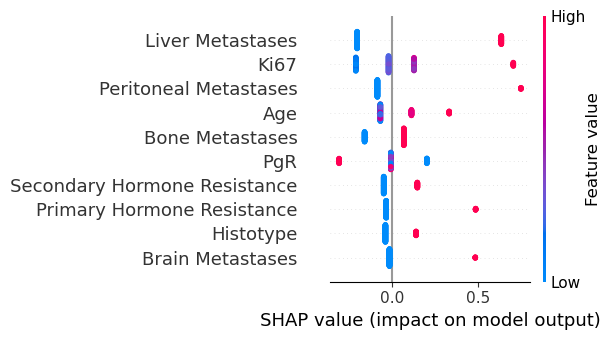

In [271]:
plt.figure() 
shap.summary_plot(
    shap_values,
    X_trans_test,
    feature_names=nicer_feature_names,
    plot_type="dot",
    max_display=10, plot_size=(6, 3.5),
    show=False          # ⬅️ IMPORTANT
)

plt.savefig("shap_summary.svg", format="svg", bbox_inches="tight")
plt.show()
plt.close()

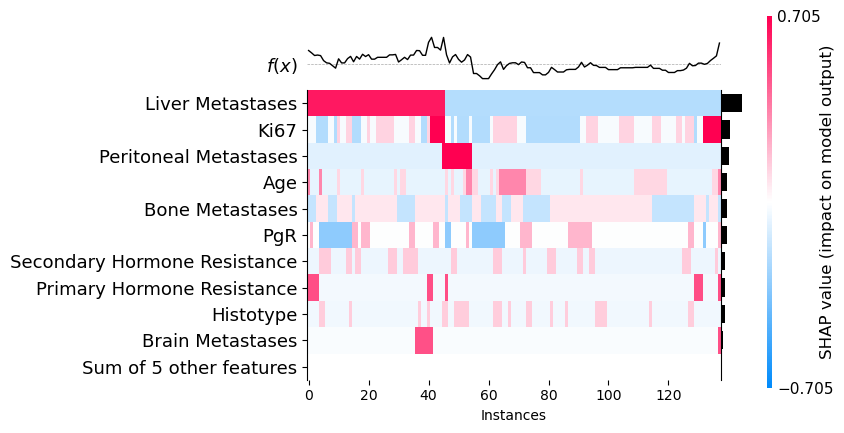

In [278]:
#risk_score = model.predict(X_trans_test)
#instance_order = np.argsort(risk_score)
#shap.plots.heatmap(exp, instance_order=instance_order, max_display=10)

plt.figure() 
shap.plots.heatmap(
    exp,
    max_display=11,
    plot_width=6,   # ✅ width in inches (height is auto-scaled)
    show=False
)
plt.savefig("shap_heatmap.svg", format="svg", bbox_inches="tight")
plt.show()
plt.close()

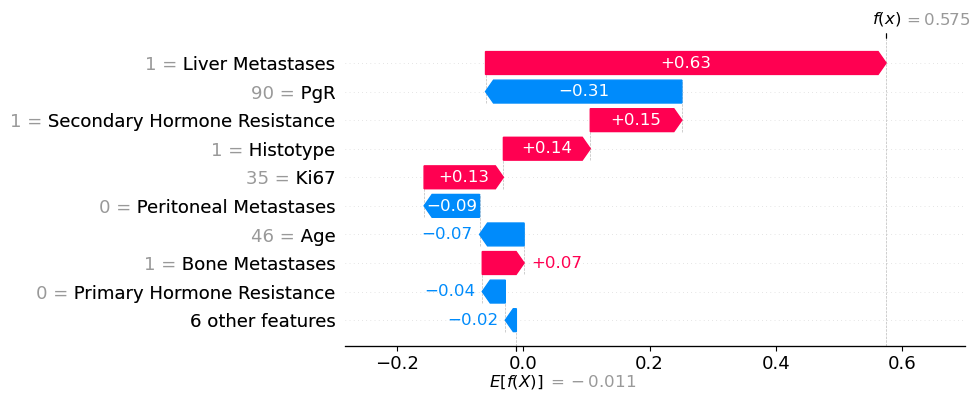

In [289]:
i = 0  # patient index

shap.plots.waterfall(exp[i], max_display=10, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4)   # width, height in inches
plt.savefig(f"shap_waterfall_{i}.svg", format="svg", bbox_inches="tight")
plt.show()
plt.close(fig)

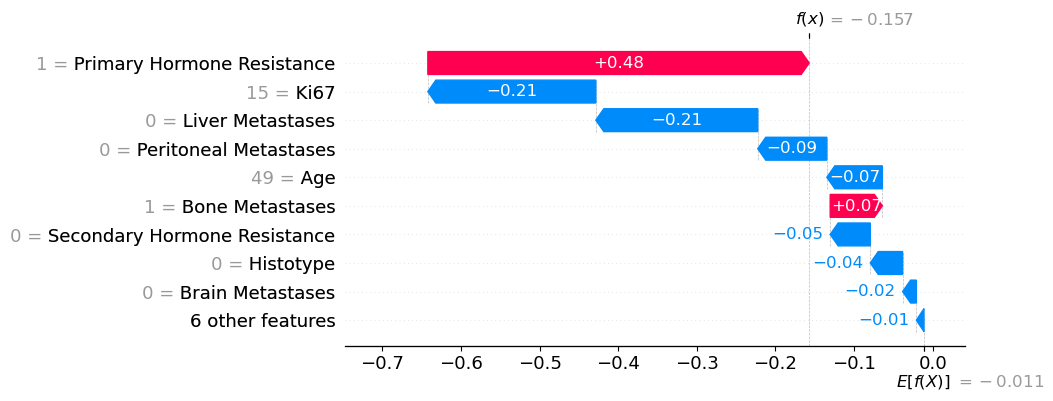

In [295]:
i = 2  # patient index

shap.plots.waterfall(exp[i], max_display=10, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4)   # width, height in inches
plt.savefig(f"shap_waterfall_{i}.svg", format="svg", bbox_inches="tight")
plt.show()
plt.close(fig)

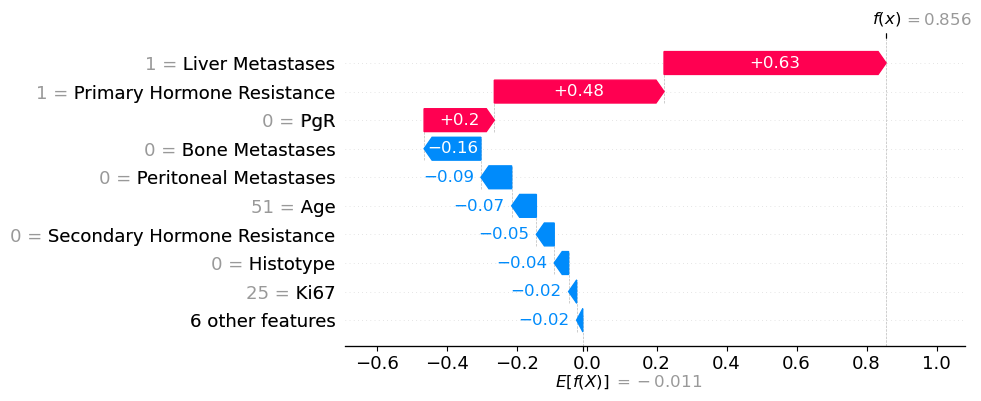

In [296]:
i = 3  # patient index

shap.plots.waterfall(exp[i], max_display=10, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4)   # width, height in inches
plt.savefig(f"shap_waterfall_{i}.svg", format="svg", bbox_inches="tight")
plt.show()
plt.close(fig)

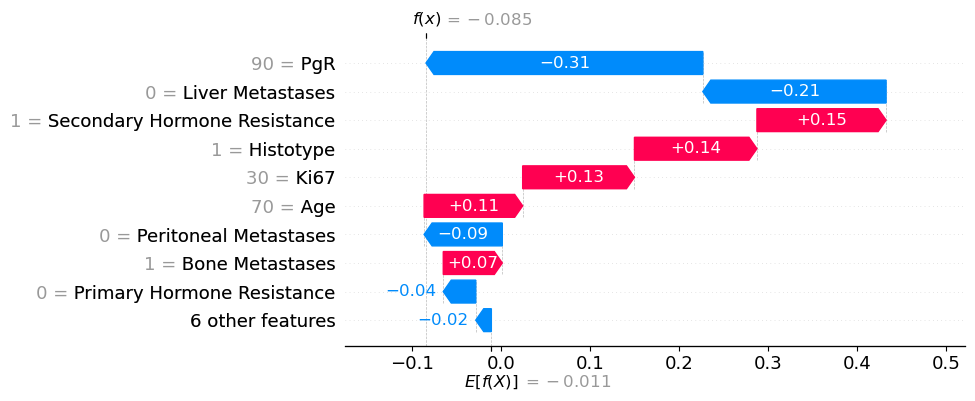

In [297]:
i = 4  # patient index

shap.plots.waterfall(exp[i], max_display=10, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 4)   # width, height in inches
plt.savefig(f"shap_waterfall_{i}.svg", format="svg", bbox_inches="tight")
plt.show()
plt.close(fig)

### Survival Function

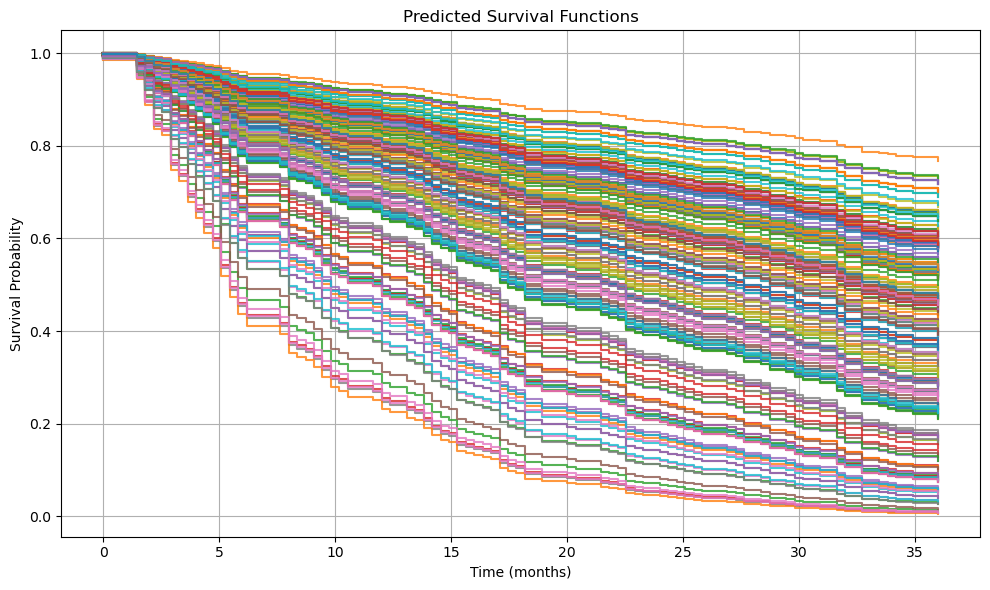

In [406]:
# Fit on full training data
gbm_model.fit(X_train, y_train)

surv_fns = gbm_model.predict_survival_function(X_train)
time_points = np.linspace(0, 36, 100)  # More resolution

_, ax = plt.subplots(figsize=(10, 6))
legend_handles = []

# Optional: only show first N patients to avoid clutter
N = 350

for i, fn in enumerate(surv_fns[:N]):
    (line,) = ax.step(time_points, fn(time_points), where="post", alpha=0.8, label=f"Patient {i+1}")
    legend_handles.append(line)

#ax.legend(loc="upper right", title="Patients")
ax.set_title("Predicted Survival Functions")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Survival Probability")
ax.grid(True)
plt.tight_layout()
plt.show()

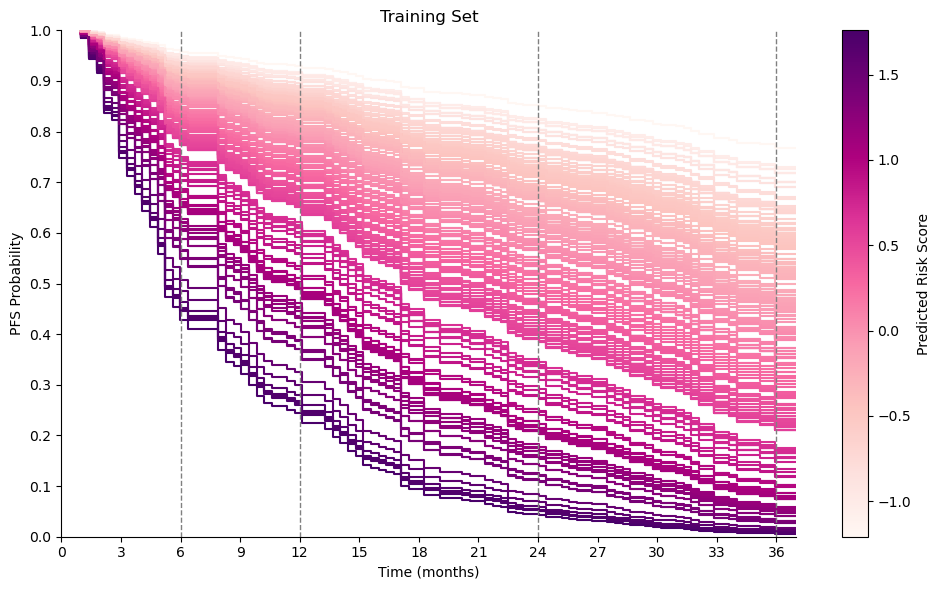

In [431]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


# Predict survival functions and risk scores
surv_fns = gbm_model.predict_survival_function(X_train)
risk_scores = gbm_model.predict(X_train)  # Higher risk = worse survival
risk_scores

# Normalize risk scores for color mapping
norm = colors.Normalize(vmin=min(risk_scores), vmax=max(risk_scores))
cmap = cm.get_cmap("RdPu")  # Choose any matplotlib colormap

time_points = np.linspace(1, 39, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (fn, risk) in enumerate(zip(surv_fns, risk_scores)):
    color = cmap(norm(risk))  # Map risk score to color
    ax.step(time_points, fn(time_points), where="post", color=color, alpha=1, label=f"Risk: {risk:.2f}")

# Colorbar to interpret risk scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Risk Score")

ax.set_xticks(range(0, 37, 3))
ax.set_xlim(0, 37)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)

ax.set_title("Training Set")
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS Probability")
ax.grid(False)
#add vertical line at 18 months
ax.axvline(x=6, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=12, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=24, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=36, color='gray', linestyle='--', linewidth=1)

# remove upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("Survival_by_risk_GBM.svg", format="svg")
plt.show()

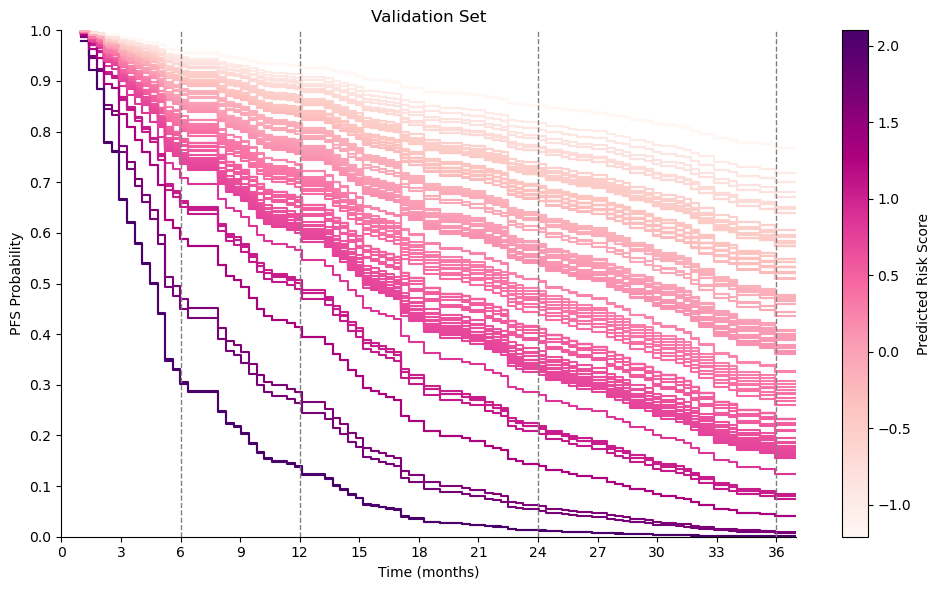

In [432]:
# Predict survival functions and risk scores
surv_fns = gbm_model.predict_survival_function(X_test)
risk_scores = gbm_model.predict(X_test)  # Higher risk = worse survival
risk_scores

# Normalize risk scores for color mapping
norm = colors.Normalize(vmin=min(risk_scores), vmax=max(risk_scores))
cmap = cm.get_cmap("RdPu")  # Choose any matplotlib colormap

time_points = np.linspace(1, 39, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (fn, risk) in enumerate(zip(surv_fns, risk_scores)):
    color = cmap(norm(risk))  # Map risk score to color
    ax.step(time_points, fn(time_points), where="post", color=color, alpha=1, label=f"Risk: {risk:.2f}")

# Colorbar to interpret risk scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Risk Score")

ax.set_xticks(range(0, 37, 3))
ax.set_xlim(0, 37)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)

ax.set_title("Validation Set")
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS Probability")
ax.grid(False)
#add vertical line at 18 months
ax.axvline(x=6, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=12, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=24, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=36, color='gray', linestyle='--', linewidth=1)

# remove upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("Survival_by_risk_GBM_test.svg", format="svg")
plt.show()

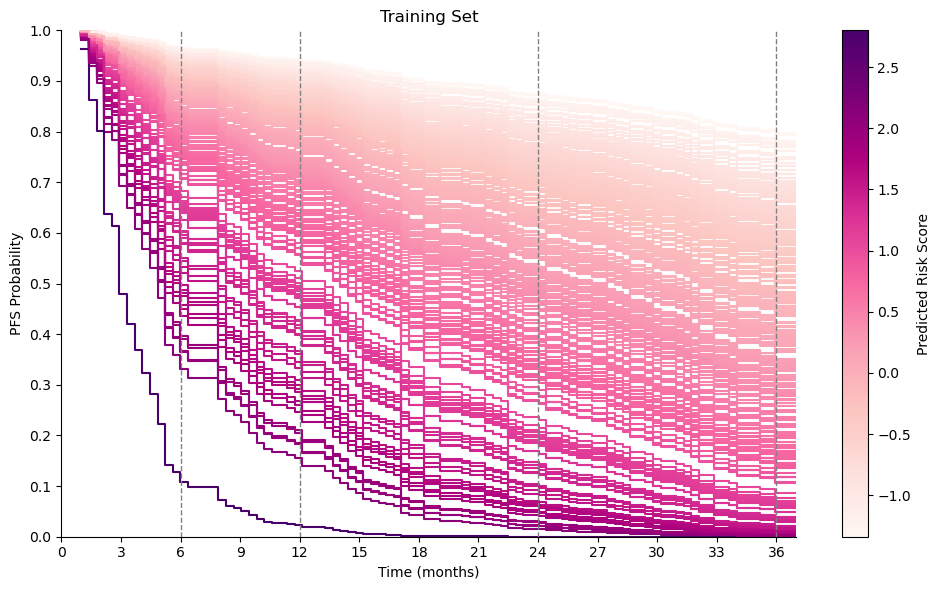

In [433]:
# Predict survival functions and risk scores
surv_fns = cox_model.predict_survival_function(X_train)
risk_scores = cox_model.predict(X_train)  # Higher risk = worse survival
risk_scores

# Normalize risk scores for color mapping
norm = colors.Normalize(vmin=min(risk_scores), vmax=max(risk_scores))
cmap = cm.get_cmap("RdPu")  # Choose any matplotlib colormap

time_points = np.linspace(1, 39, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (fn, risk) in enumerate(zip(surv_fns, risk_scores)):
    color = cmap(norm(risk))  # Map risk score to color
    ax.step(time_points, fn(time_points), where="post", color=color, alpha=1, label=f"Risk: {risk:.2f}")

# Colorbar to interpret risk scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Risk Score")

ax.set_xticks(range(0, 37, 3))
ax.set_xlim(0, 37)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)

ax.set_title("Training Set")
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS Probability")
ax.grid(False)
#add vertical line at 18 months
ax.axvline(x=6, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=12, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=24, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=36, color='gray', linestyle='--', linewidth=1)

# remove upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("Survival_by_risk_Cox.svg", format="svg")
plt.show()

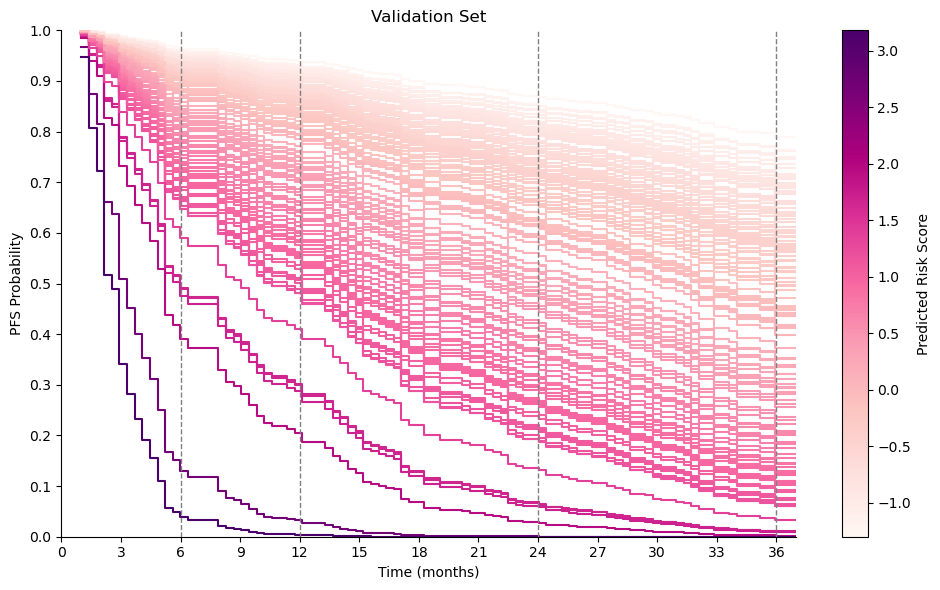

In [434]:
# Predict survival functions and risk scores
surv_fns = cox_model.predict_survival_function(X_test)
risk_scores = cox_model.predict(X_test)  # Higher risk = worse survival
risk_scores

# Normalize risk scores for color mapping
norm = colors.Normalize(vmin=min(risk_scores), vmax=max(risk_scores))
cmap = cm.get_cmap("RdPu")  # Choose any matplotlib colormap

time_points = np.linspace(1, 39, 100)

fig, ax = plt.subplots(figsize=(10, 6))

for i, (fn, risk) in enumerate(zip(surv_fns, risk_scores)):
    color = cmap(norm(risk))  # Map risk score to color
    ax.step(time_points, fn(time_points), where="post", color=color, alpha=1, label=f"Risk: {risk:.2f}")

# Colorbar to interpret risk scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Risk Score")

ax.set_xticks(range(0, 37, 3))
ax.set_xlim(0, 37)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)

ax.set_title("Validation Set")
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS Probability")
ax.grid(False)
#add vertical line at 18 months
ax.axvline(x=6, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=12, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=24, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=36, color='gray', linestyle='--', linewidth=1)

# remove upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("Survival_by_risk_Cox_test.svg", format="svg")
plt.show()

#### GMM

In [57]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted risk scores
risk_scores = gbm_model.predict(X_train)

# Reshape for GMM (expects 2D input)
risk_scores_reshaped = risk_scores.reshape(-1, 1)

# Fit a 2-component Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(risk_scores_reshaped)

# Predict cluster membership
clusters = gmm.predict(risk_scores_reshaped)

# Find the mean of each component (to locate cutoff between low/high risk)
means = gmm.means_.flatten()
means.sort()  # Ensure low to high order

# Find the cutoff as the midpoint between the two means
cutoff = np.mean(means)

print(f"Cluster means: {means}")
print(f"Suggested cutoff between risk groups: {cutoff:.4f}")

Cluster means: [-0.34911529  0.63561467]
Suggested cutoff between risk groups: 0.1432


In [ ]:
# Extract parameters (1D)
means = gmm.means_.flatten()
vars_ = gmm.covariances_.flatten()   # variances in 1D
sds = np.sqrt(vars_)
weights = gmm.weights_.flatten()

# Sort components by mean (low -> high)
order = np.argsort(means)
m1, m2 = means[order]
s1, s2 = sds[order]
p1, p2 = weights[order]

print("Component means (sorted):", [m1, m2])
print("Component sds (sorted):", [s1, s2])
print("Component weights (sorted):", [p1, p2])
print(f"Intersection cutoff: {cutoff:.4f}")

# Assign groups using the cutoff (simple and reproducible)
risk_group = np.where(risk_scores >= cutoff, "High", "Low")

Component means (sorted): [-0.34911528529001884, 0.6356146686287011]
Component sds (sorted): [0.3153644539529184, 0.4985286000188773]
Component weights (sorted): [0.6454710411715222, 0.35452895882847774]
Intersection cutoff: 0.1432


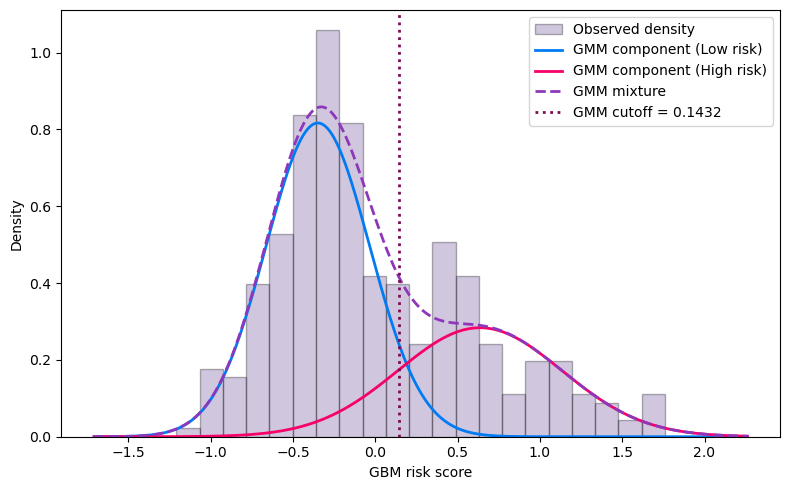

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Use training risk scores
x = risk_scores

# Grid for smooth curves
xx = np.linspace(x.min() - 0.5, x.max() + 0.5, 1000)

# Component densities (weighted)
d1 = p1 * norm.pdf(xx, m1, s1)
d2 = p2 * norm.pdf(xx, m2, s2)
d_sum = d1 + d2

plt.figure(figsize=(8, 5))

# Empirical density
plt.hist(x, bins=21, density=True, alpha=0.3, color="#664797", edgecolor="black", label="Observed density")

# GMM components
plt.plot(xx, d1, lw=2, label="GMM component (Low risk)", color="#007bf4")
plt.plot(xx, d2, lw=2, label="GMM component (High risk)", color = "#f70069")
plt.plot(xx, d_sum, lw=2, ls="--", label="GMM mixture", color="#8f37bb")

# Cutoff
plt.axvline(cutoff, color="#7b0c51", ls=":", lw=2,
            label=f"GMM cutoff = {cutoff:.4f}")

plt.xlabel("GBM risk score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig("GBM_GMM_risk_scores.svg", format="svg")
plt.show()


In [89]:
from lifelines import CoxPHFitter
import pandas as pd

# Step 1: Predict risk scores from RSF model (on X_train if you want to analyze training data)
risk_scores = gbm_model.predict(X_train)  # or X_test, depending on what you want to evaluate

# Step 2: Convert y_train to DataFrame for lifelines
# y_train is a structured array with fields 'event' and 'time'
y_df = pd.DataFrame({
    'PD': y_train['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_train['PFS']                 # time to event or censoring
})

# Step 3: Add risk group
y_df['clusters'] = (risk_scores > cutoff).astype(int)  # this becomes your binary group

# Step 4: Fit Cox model
cph = CoxPHFitter()
cph.fit(y_df, duration_col='PFS', event_col='PD')

# Step 5: Show results
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 321 total observations, 146 right-censored observations>
             duration col = 'PFS'
                event col = 'PD'
      baseline estimation = breslow
   number of observations = 321
number of events observed = 175
   partial log-likelihood = -857.27
         time fit was run = 2026-01-07 20:19:57 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
clusters   1.42      4.14      0.16            1.11            1.73                3.04                5.64

           cmp to    z      p  -log2(p)
covariate                              
clusters     0.00 9.03 <0.005     62.39
---
Concordance = 0.66
Partial AIC = 1716.54
log-likelihood ratio test = 79.47 on 1 df
-log2(p) of ll-ratio test = 60.82

In [90]:
y_df['risk_score'] = risk_scores
y_df.to_excel("GBM_risk_scores_train.xlsx", index=False)

In [91]:
summary_df = cph.summary

# Extract the data for plotting
hr = summary_df.loc['clusters', 'exp(coef)']
ci_lower = summary_df.loc['clusters', 'exp(coef) lower 95%']
ci_upper = summary_df.loc['clusters', 'exp(coef) upper 95%']
p_value = summary_df.loc['clusters', 'p']

print(p_value)

1.6581896428375385e-19


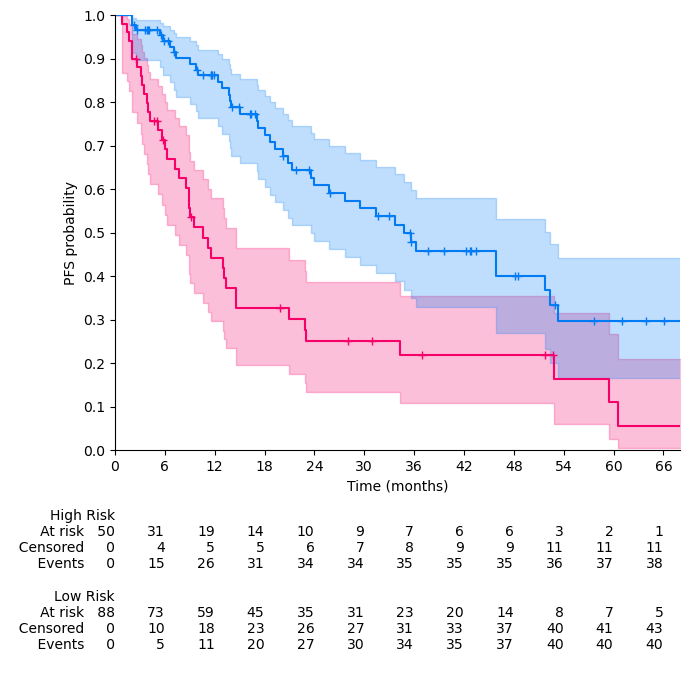

In [127]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

colors = {
    "High Risk": "#f70069",   # blue
    "Low Risk": "#007bf4"        # red
}
# Masks for groups
mask_high = y_df['clusters'] == 1
mask_low  = y_df['clusters'] == 0

# Fit KM for each group
km_high = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_high, 'PFS'],
    event_observed=y_df.loc[mask_high, 'PD'], 
    label='High Risk'
)
km_low = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_low, 'PFS'],
    event_observed=y_df.loc[mask_low, 'PD'],
    label='Low Risk'
)

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
km_high.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6},color=colors["High Risk"])
km_low.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6}, color=colors["Low Risk"])

# Axes/labels
ax.set_xticks(range(0, 72, 6))
ax.set_xlim(0, 68)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS probability")
ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#no legend
ax.legend().set_visible(False)

# Risk table (single, for both groups)
add_at_risk_counts(km_high, km_low, ax=ax)

plt.tight_layout()
plt.savefig("Risk_Train.svg", format="svg")
plt.show()

In [121]:
# Log-rank test p-value
res = logrank_test(
    y_df.loc[mask_high, 'PFS'], y_df.loc[mask_low, 'PFS'],
    event_observed_A=y_df.loc[mask_high, 'PD'],
    event_observed_B=y_df.loc[mask_low, 'PD']
)
print(f"Log-rank p-value: {res.p_value:.4f}")

Log-rank p-value: 0.0000


In [221]:
def bootstrap_median_ci(T, E, n_iterations=1000, ci=0.95):
    medians = []
    n = len(T)
    for _ in range(n_iterations):
        idx = np.random.choice(n, n, replace=True)
        kmf = KaplanMeierFitter()
        kmf.fit(T.iloc[idx], E.iloc[idx])
        medians.append(kmf.median_survival_time_)
    lower = np.percentile(medians, (1 - ci) / 2 * 100)
    upper = np.percentile(medians, (1 + ci) / 2 * 100)
    return lower, upper

for group in [0, 1]:
    mask = y_df['clusters'] == group
    T = y_df.loc[mask, 'PFS']
    E = y_df.loc[mask, 'PD']
    
    kmf.fit(T, event_observed=E, label=f'Group {group}')
    median_ = kmf.median_survival_time_
    
    lower, upper = bootstrap_median_ci(T, E)
    
    print(f'Group {group}: Median Survival = {median_}')
    print(f'95% CI Lower = {lower}, Upper = {upper}\n')



Group 0: Median Survival = 58.1
95% CI Lower = 40.8, Upper = nan

Group 1: Median Survival = 13.7
95% CI Lower = 9.8, Upper = 17.5



In [237]:
from tableone import TableOne
import numpy as np

# Merge predictors and outcomes, keeping clusters
cluster_df = pd.concat([X_train.reset_index(drop=True), y_df.reset_index(drop=True)], axis=1)

# Replace "None" with missing
cluster_df.replace("None", pd.NA, inplace=True)

# Define variables
columns = cluster_df.columns.drop("clusters").tolist()

categorical = [
    'Histotype', 'Menopausal', 'M_Brain', 'M_Liver',
    'M_Bone', 'M_Peritoneal', 'Bone_Only',
    'Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary', 'Sinc', 'HER2'
]

nonnormal = ['Age', 'ER', 'PgR', 'Ki67', 'PFS']  # PD is binary, so better keep it categorical

# Build Table 1 stratified by risk clusters
my_table = TableOne(
    cluster_df,
    columns=columns,
    categorical=categorical + ['PD'],  # ensure PD is categorical
    groupby="clusters",
    pval=True,
    nonnormal=nonnormal,
    missing=True
)

# Print table
print(my_table)

# Save to Excel
my_table.to_excel("train_clusters.xlsx", index=True)


                                         Grouped by clusters                                                              
                                                     Missing           Overall                 0                 1 P-Value
n                                                                          321               206               115        
Age, median [Q1,Q3]                                        0  61.8 [52.7,70.6]  62.1 [54.5,71.4]  59.4 [50.0,69.7]   0.079
Menopausal, n (%)                   0.0                              74 (23.1)         42 (20.4)         32 (27.8)   0.193
                                    1.0                             245 (76.3)        162 (78.6)         83 (72.2)        
                                    None                               2 (0.6)           2 (1.0)           0 (0.0)        
Hormone_Resistance_Primary, n (%)   0                               295 (91.9)        199 (96.6)         96 (83.5)  <0.001
                

In [122]:
from lifelines import CoxPHFitter
import pandas as pd

# Step 1: Predict risk scores from RSF model (on X_train if you want to analyze training data)
risk_scores = final_model.predict(X_test)  # or X_test, depending on what you want to evaluate

# Step 2: Convert y_train to DataFrame for lifelines
# y_train is a structured array with fields 'event' and 'time'
y_df = pd.DataFrame({
    'PD': y_test['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_test['PFS']                 # time to event or censoring
})

# Step 3: Add risk group
y_df['clusters'] = (risk_scores > cutoff).astype(int)  # this becomes your binary group

# Step 4: Fit Cox model
cph = CoxPHFitter()
cph.fit(y_df, duration_col='PFS', event_col='PD')

# Step 5: Show results
cph.print_summary()



<lifelines.CoxPHFitter: fitted with 138 total observations, 60 right-censored observations>
             duration col = 'PFS'
                event col = 'PD'
      baseline estimation = breslow
   number of observations = 138
number of events observed = 78
   partial log-likelihood = -318.07
         time fit was run = 2026-01-07 21:36:42 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
clusters   0.95      2.58      0.23            0.50            1.39                1.65                4.03

           cmp to    z      p  -log2(p)
covariate                              
clusters     0.00 4.15 <0.005     14.90
---
Concordance = 0.65
Partial AIC = 638.14
log-likelihood ratio test = 16.54 on 1 df
-log2(p) of ll-ratio test = 14.36

In [123]:
y_df['risk_score'] = risk_scores
y_df.to_excel("GBM_risk_scores_test.xlsx", index=False)

In [124]:
summary_df = cph.summary

# Extract the data for plotting
hr = summary_df.loc['clusters', 'exp(coef)']
ci_lower = summary_df.loc['clusters', 'exp(coef) lower 95%']
ci_upper = summary_df.loc['clusters', 'exp(coef) upper 95%']
p_value = summary_df.loc['clusters', 'p']

print(p_value)

3.265413922202501e-05


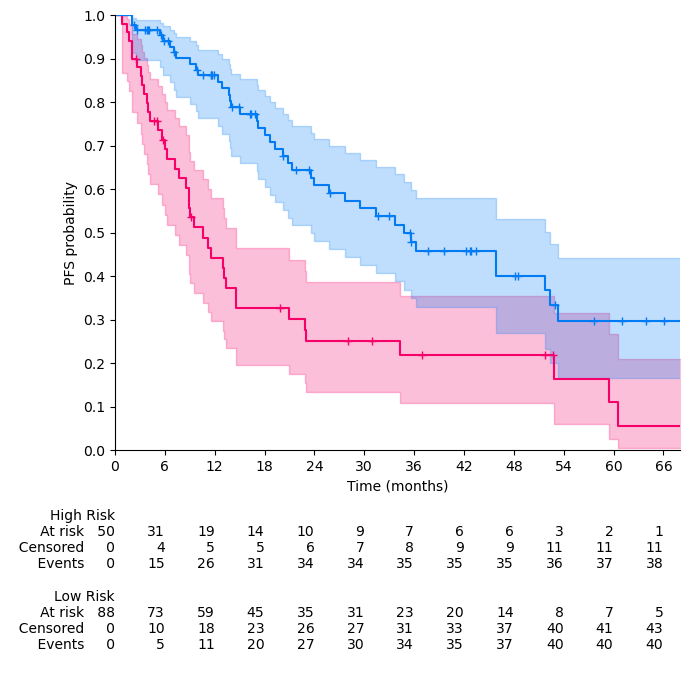

In [128]:
mask_high = y_df['clusters'] == 1
mask_low  = y_df['clusters'] == 0

# Fit KM for each group
km_high = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_high, 'PFS'],
    event_observed=y_df.loc[mask_high, 'PD'],
    label='High Risk'
)
km_low = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_low, 'PFS'],
    event_observed=y_df.loc[mask_low, 'PD'],
    label='Low Risk'
)

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
km_high.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6},color=colors["High Risk"])
km_low.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6}, color=colors["Low Risk"])

# Axes/labels
ax.set_xticks(range(0, 72, 6))
ax.set_xlim(0, 68)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS probability")
ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_visible(False)

# Risk table (single, for both groups)
add_at_risk_counts(km_high, km_low, ax=ax)

plt.tight_layout()
plt.savefig("Risk_Val.svg", format="svg")
plt.show()



In [130]:
# Log-rank test p-value
res = logrank_test(
    y_df.loc[mask_high, 'PFS'], y_df.loc[mask_low, 'PFS'],
    event_observed_A=y_df.loc[mask_high, 'PD'],
    event_observed_B=y_df.loc[mask_low, 'PD']
)
print(f"Log-rank p-value: {res.p_value:.4f}")

Log-rank p-value: 0.0000


In [241]:
# Merge predictors and outcomes, keeping clusters
cluster_df = pd.concat([X_train.reset_index(drop=True), y_df.reset_index(drop=True)], axis=1)

# Replace "None" with missing
cluster_df.replace("None", pd.NA, inplace=True)

# Define variables
columns = cluster_df.columns.drop("clusters").tolist()

categorical = [
    'Histotype', 'Menopausal', 'M_Brain', 'M_Liver',
    'M_Bone', 'M_Peritoneal', 'Bone_Only',
    'Hormone_Resistance_Primary', 'Hormone_Resistance_Secondary', 'Sinc', 'HER2'
]

nonnormal = ['Age', 'ER', 'PgR', 'Ki67', 'PFS']  # PD is binary, so better keep it categorical

# Build Table 1 stratified by risk clusters
my_table = TableOne(
    cluster_df,
    columns=columns,
    categorical=categorical + ['PD'],  # ensure PD is categorical
    groupby="clusters",
    pval=True,
    nonnormal=nonnormal,
    missing=True
)

# Print table
print(my_table)

# Save to Excel
my_table.to_excel("val_clusters.xlsx", index=True)

                                         Grouped by clusters                                                              
                                                     Missing           Overall               0.0               1.0 P-Value
n                                                                          321                88                50        
Age, median [Q1,Q3]                                        0  61.8 [52.7,70.6]  65.5 [55.6,73.8]  60.9 [51.5,68.8]   0.036
Menopausal, n (%)                   0.0                              74 (23.1)         18 (20.5)         11 (22.0)   1.000
                                    1.0                             245 (76.3)         70 (79.5)         39 (78.0)        
                                    None                               2 (0.6)           0 (0.0)           0 (0.0)        
Hormone_Resistance_Primary, n (%)   0                               295 (91.9)         82 (93.2)         45 (90.0)   0.527
                

In [231]:
def bootstrap_median_ci(T, E, n_iterations=1000, ci=0.95):
    medians = []
    n = len(T)
    for _ in range(n_iterations):
        idx = np.random.choice(n, n, replace=True)
        kmf = KaplanMeierFitter()
        kmf.fit(T.iloc[idx], E.iloc[idx])
        medians.append(kmf.median_survival_time_)
    lower = np.percentile(medians, (1 - ci) / 2 * 100)
    upper = np.percentile(medians, (1 + ci) / 2 * 100)
    return lower, upper

for group in [0, 1]:
    mask = y_df['clusters'] == group
    T = y_df.loc[mask, 'PFS']
    E = y_df.loc[mask, 'PD']
    
    kmf.fit(T, event_observed=E, label=f'Group {group}')
    median_ = kmf.median_survival_time_
    
    lower, upper = bootstrap_median_ci(T, E)
    
    print(f'Group {group}: Median Survival = {median_}')
    print(f'95% CI Lower = {lower}, Upper = {upper}\n')


Group 0: Median Survival = 34.8
95% CI Lower = 24.0, Upper = 52.4

Group 1: Median Survival = 10.6
95% CI Lower = 7.7, Upper = 14.6



### MSRS


In [131]:
## MSRS = 0.2030

risk_scores = gbm_model.predict(X_train)  # or X_test, depending on what you want to evaluate

# Step 2: Convert y_train to DataFrame for lifelines
y_df = pd.DataFrame({
    'PD': y_train['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_train['PFS']                 # time to event or censoring
})

y_df['clusters'] = (risk_scores > 0.2030).astype(int)  # this becomes your binary group

# Step 4: Fit Cox model
cph = CoxPHFitter()
cph.fit(y_df, duration_col='PFS', event_col='PD')

# Step 5: Show results
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 321 total observations, 146 right-censored observations>
             duration col = 'PFS'
                event col = 'PD'
      baseline estimation = breslow
   number of observations = 321
number of events observed = 175
   partial log-likelihood = -850.71
         time fit was run = 2026-01-07 22:06:00 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
clusters   1.59      4.92      0.16            1.28            1.91                3.58                6.76

           cmp to    z      p  -log2(p)
covariate                              
clusters     0.00 9.84 <0.005     73.55
---
Concordance = 0.67
Partial AIC = 1703.41
log-likelihood ratio test = 92.60 on 1 df
-log2(p) of ll-ratio test = 70.40

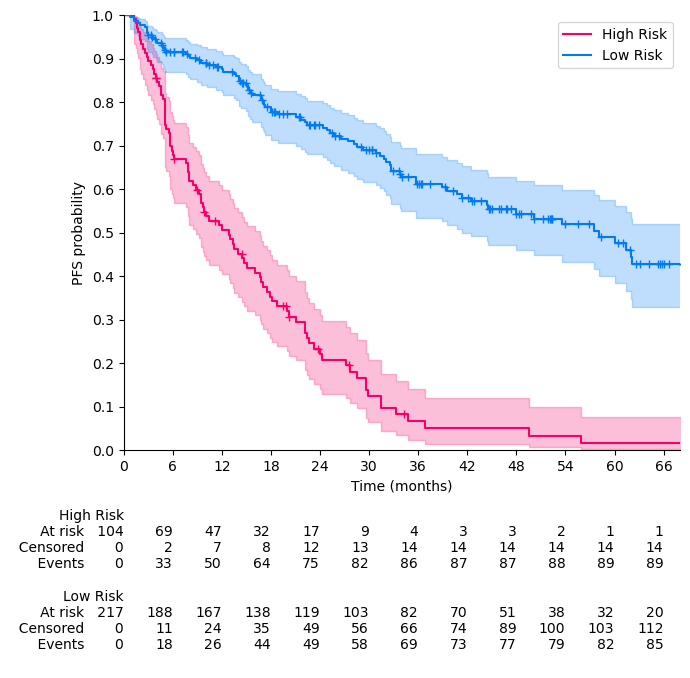

In [134]:
# Masks for groups
mask_high = y_df['clusters'] == 1
mask_low  = y_df['clusters'] == 0

# Fit KM for each group
km_high = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_high, 'PFS'],
    event_observed=y_df.loc[mask_high, 'PD'], 
    label='High Risk'
)
km_low = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_low, 'PFS'],
    event_observed=y_df.loc[mask_low, 'PD'],
    label='Low Risk'
)

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
km_high.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6},color=colors["High Risk"])
km_low.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6}, color=colors["Low Risk"])

# Axes/labels
ax.set_xticks(range(0, 72, 6))
ax.set_xlim(0, 68)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS probability")
ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#no legend
ax.legend(loc='upper right')

# Risk table (single, for both groups)
add_at_risk_counts(km_high, km_low, ax=ax)

plt.tight_layout()
plt.savefig("Risk_Train_MSRS.png", format="png")
plt.show()

In [135]:
risk_scores = gbm_model.predict(X_test)  # or X_test, depending on what you want to evaluate

# Step 2: Convert y_test to DataFrame for lifelines
y_df = pd.DataFrame({
    'PD': y_test['PD'].astype(int),          # event occurred: 1/0
    'PFS': y_test['PFS']                 # time to event or censoring
})

y_df['clusters'] = (risk_scores > 0.2030).astype(int)  # this becomes your binary group

# Step 4: Fit Cox model
cph = CoxPHFitter()
cph.fit(y_df, duration_col='PFS', event_col='PD')

# Step 5: Show results
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 138 total observations, 60 right-censored observations>
             duration col = 'PFS'
                event col = 'PD'
      baseline estimation = breslow
   number of observations = 138
number of events observed = 78
   partial log-likelihood = -316.17
         time fit was run = 2026-01-07 22:12:09 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
clusters   1.06      2.88      0.23            0.61            1.51                1.84                4.52

           cmp to    z      p  -log2(p)
covariate                              
clusters     0.00 4.63 <0.005     18.04
---
Concordance = 0.65
Partial AIC = 634.33
log-likelihood ratio test = 20.36 on 1 df
-log2(p) of ll-ratio test = 17.25

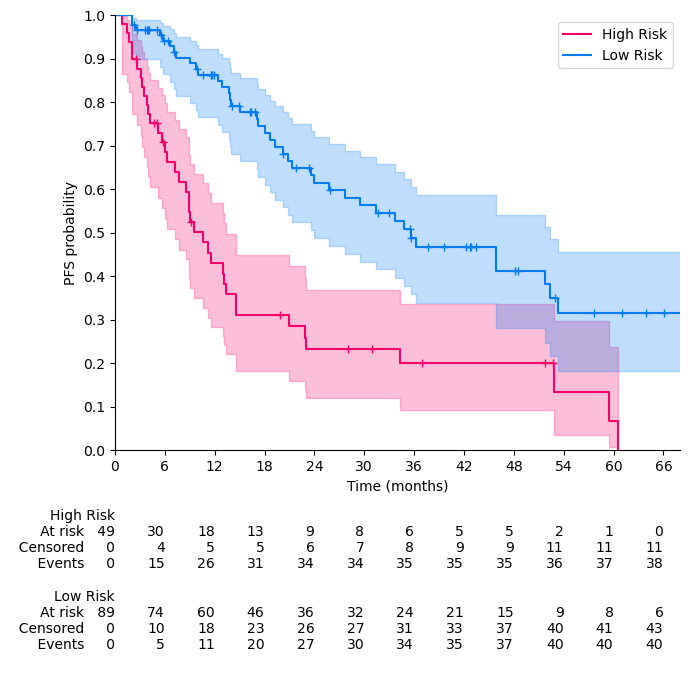

In [136]:
# Masks for groups
mask_high = y_df['clusters'] == 1
mask_low  = y_df['clusters'] == 0

# Fit KM for each group
km_high = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_high, 'PFS'],
    event_observed=y_df.loc[mask_high, 'PD'], 
    label='High Risk'
)
km_low = KaplanMeierFitter().fit(
    durations=y_df.loc[mask_low, 'PFS'],
    event_observed=y_df.loc[mask_low, 'PD'],
    label='Low Risk'
)

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
km_high.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6},color=colors["High Risk"])
km_low.plot_survival_function(ax=ax, ci_show=True, show_censors = True, censor_styles={'ms': 6}, color=colors["Low Risk"])

# Axes/labels
ax.set_xticks(range(0, 72, 6))
ax.set_xlim(0, 68)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)
ax.set_xlabel("Time (months)")
ax.set_ylabel("PFS probability")
ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#no legend
ax.legend(loc='upper right')

# Risk table (single, for both groups)
add_at_risk_counts(km_high, km_low, ax=ax)

plt.tight_layout()
plt.savefig("Risk_Test_MSRS.png", format="png")
plt.show()

## Early progression as binary

#### Train and recalibration

In [75]:
# Predict survival functions for train set
surv_fns_train = gbm_model.predict_survival_function(X_train)

# Evaluate survival probability at 6 months
target_time = 6.0
surv_at_6_months = np.array([fn(target_time) for fn in surv_fns_train])

# Identify patients with event before 6 months
observed_event_mask = (y_train["PD"] == True) & (y_train["PFS"] < 6.0)

# Identify patients censored before 6 months (to be excluded)
censored_before_6_mask = (y_train["PD"] == False) & (y_train["PFS"] < 6.0)
# Exclude censored patients before 6 months
valid_indices = ~censored_before_6_mask

# Filter predictions and ground truth
y_true_binary = observed_event_mask[valid_indices]

# Count number of events (True in y_true_binary)
n_events = y_true_binary.sum()
n_total = y_true_binary.shape[0]

# Compute percentage
percent_events = (n_events / n_total) * 100

# Report
print(f'Number of Events: {n_events} out of {n_total} ({percent_events:.1f}%)')

# rischio = P(evento entro 6 mesi) = 1 - S(6)
risk_6m = 1 - surv_at_6_months

# y_true binaria (già corretta perché hai escluso censurati <6 mesi)
y_true = y_true_binary.astype(int)
y_risk = risk_6m[valid_indices]

Number of Events: 50 out of 308 (16.2%)


In [76]:
from sklearn.metrics import f1_score
thresholds = np.unique(y_risk)

best_t, best_f1 = None, -1
for t in thresholds:
    y_pred = (y_risk >= t).astype(int)   # high-risk se risk >= t
    f1 = f1_score(y_true, y_pred, zero_division=0)
    if f1 > best_f1:
        best_f1, best_t = f1, t

print(f"Best cutoff (risk): {best_t:.4f}  |  Best F1: {best_f1:.3f}")

best_surv_cutoff = 1 - best_t
print(f"Equivalent cutoff on S(6): {best_surv_cutoff:.4f} (predict event if S(6) <= cutoff)")

from sklearn.metrics import precision_score, recall_score, confusion_matrix
y_pred_best = (y_risk >= best_t).astype(int)

prec = precision_score(y_true, y_pred_best, zero_division=0)
rec  = recall_score(y_true, y_pred_best, zero_division=0)
cm   = confusion_matrix(y_true, y_pred_best)

print(f"Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {best_f1:.3f}")
print("Confusion matrix:\n", cm)

Best cutoff (risk): 0.2032  |  Best F1: 0.441
Equivalent cutoff on S(6): 0.7968 (predict event if S(6) <= cutoff)
Precision: 0.364 | Recall: 0.560 | F1: 0.441
Confusion matrix:
 [[209  49]
 [ 22  28]]


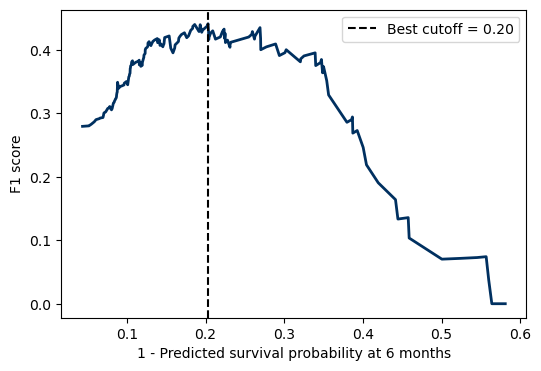

In [84]:
thresholds = np.unique(y_risk)
f1_values = []

for t in thresholds:
    y_pred = (y_risk >= t).astype(int)
    f1_values.append(f1_score(y_true, y_pred, zero_division=0))

f1_values = np.array(f1_values)

plt.figure(figsize=(6, 4))
plt.plot(thresholds, f1_values, color="#003060", lw=2)
plt.axvline(best_t, color="black", linestyle="--", label=f"Best cutoff = {best_t:.2f}")
plt.xlabel("1 - Predicted survival probability at 6 months")
plt.ylabel("F1 score")
plt.title("")
plt.legend()
plt.grid(False)

plt.savefig("F1_vs_threshold.svg", format="svg")
plt.show()

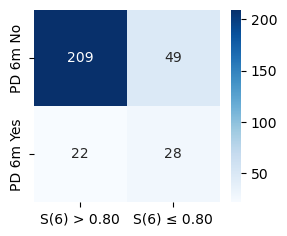

In [54]:
#Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(3, 2.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['S(6) > 0.80', 'S(6) ≤ 0.80'],
            yticklabels=['PD 6m No', 'PD 6m Yes'])

plt.savefig("confusion_matrix_train.svg", format="svg", bbox_inches="tight")

#### Test

In [55]:
# Predict survival functions for test set
surv_fns_test = gbm_model.predict_survival_function(X_test)

# Evaluate survival probability at 6 months
target_time = 6.0
surv_at_6_months = np.array([fn(target_time) for fn in surv_fns_test])

# Predict as "high risk" if survival probability at 6 months is less than 80% -> From training data, see below
y_pred_binary = surv_at_6_months < best_surv_cutoff

In [56]:
# Identify patients with event before 6 months
observed_event_mask = (y_test["PD"] == True) & (y_test["PFS"] < 6.0)

# Identify patients censored before 6 months (to be excluded)
censored_before_6_mask = (y_test["PD"] == False) & (y_test["PFS"] < 6.0)

# Exclude censored patients before 6 months
valid_indices = ~censored_before_6_mask

# Filter predictions and ground truth
y_true_binary = observed_event_mask[valid_indices]
y_pred_binary = y_pred_binary[valid_indices]

# Count number of events (True in y_true_binary)
n_events = y_true_binary.sum()
n_total = y_true_binary.shape[0]

# Compute percentage
percent_events = (n_events / n_total) * 100

# Report
print(f'Number of Events: {n_events} out of {n_total} ({percent_events:.1f}%)')

Number of Events: 19 out of 124 (15.3%)


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true_binary, y_pred_binary, target_names=["No Early Event", "Early Event"]))


Confusion Matrix:
[[83 22]
 [ 7 12]]

Classification Report:
                precision    recall  f1-score   support

No Early Event       0.92      0.79      0.85       105
   Early Event       0.35      0.63      0.45        19

      accuracy                           0.77       124
     macro avg       0.64      0.71      0.65       124
  weighted avg       0.83      0.77      0.79       124



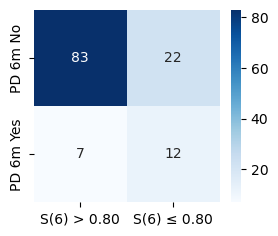

In [58]:
#Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(3, 2.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['S(6) > 0.80', 'S(6) ≤ 0.80'],
            yticklabels=['PD 6m No', 'PD 6m Yes'])

plt.savefig("confusion_matrix_test.svg", format="svg", bbox_inches="tight")

In [59]:
# We already computed this before
#y_scores = -surv_at_6_months[valid_indices]  # Negative because lower survival = higher risk
y_scores = 1 - surv_at_6_months[valid_indices]

y_true_binary = observed_event_mask[valid_indices]  # True/False labels

from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc = roc_auc_score(y_true_binary, y_scores)
pr_auc = average_precision_score(y_true_binary, y_scores)

print(f"ROC-AUC: {roc_auc:.3f}")
print(f"PR-AUC: {pr_auc:.3f}")


ROC-AUC: 0.768
PR-AUC: 0.470


In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, average_precision_score

# Point estimates
roc_auc = roc_auc_score(y_true_binary, y_scores)
pr_auc = average_precision_score(y_true_binary, y_scores)

# Bootstrap
n_bootstraps = 1000
rng = np.random.default_rng(42)
roc_values, pr_values = [], []

for _ in range(n_bootstraps):
    idx = rng.choice(len(y_scores), size=len(y_scores), replace=True)
    if len(np.unique(y_true_binary[idx])) < 2:
        # skip if bootstrap sample has only one class
        continue
    roc_values.append(roc_auc_score(y_true_binary[idx], y_scores[idx]))
    pr_values.append(average_precision_score(y_true_binary[idx], y_scores[idx]))

roc_lower, roc_upper = np.percentile(roc_values, [2.5, 97.5])
pr_lower, pr_upper   = np.percentile(pr_values, [2.5, 97.5])

print(f"ROC-AUC: {roc_auc:.2f} (95% CI: {roc_lower:.2f} – {roc_upper:.2f})")
print(f"PR-AUC : {pr_auc:.2f} (95% CI: {pr_lower:.2f} – {pr_upper:.2f})")

ROC-AUC: 0.77 (95% CI: 0.61 – 0.89)
PR-AUC : 0.47 (95% CI: 0.28 – 0.70)


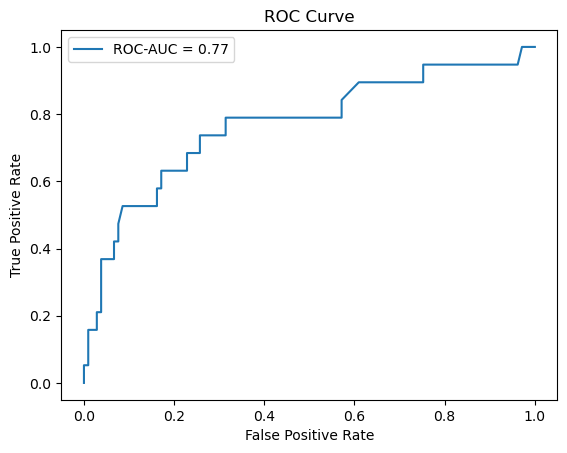

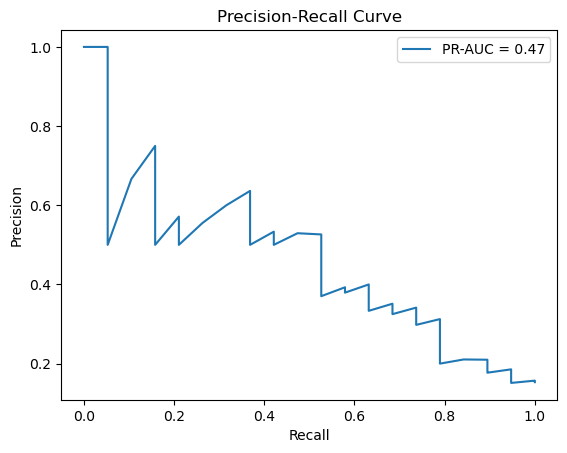

In [62]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_true_binary, y_scores)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true_binary, y_scores)
plt.figure()
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [63]:
# Data
y_true = y_true_binary
y_score = y_scores

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Bootstrap for ROC CI
n_bootstraps = 1000
rng = np.random.default_rng(42)
tpr_bootstrap = []

fpr_grid = np.linspace(0, 1, 100)

for i in range(n_bootstraps):
    idx = rng.choice(len(y_true), size=len(y_true), replace=True)
    if len(np.unique(y_true[idx])) < 2:
        continue
    fpr_i, tpr_i, _ = roc_curve(y_true[idx], y_score[idx])
    tpr_interp = np.interp(fpr_grid, fpr_i, tpr_i)
    tpr_bootstrap.append(tpr_interp)

tpr_bootstrap = np.array(tpr_bootstrap)
tpr_lower = np.percentile(tpr_bootstrap, 2.5, axis=0)
tpr_upper = np.percentile(tpr_bootstrap, 97.5, axis=0)

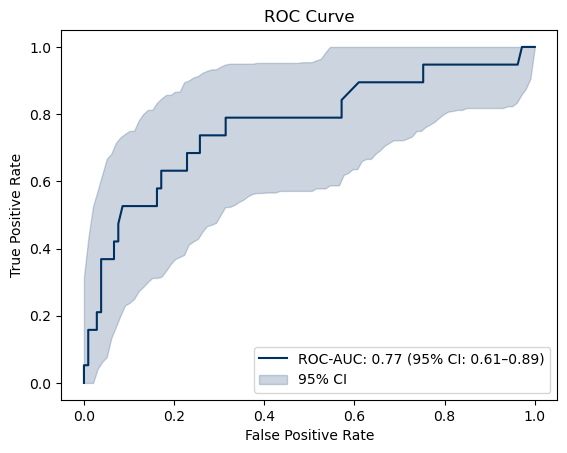

In [64]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc:.2f} (95% CI: {roc_lower:.2f}–{roc_upper:.2f})", color="#003060")
plt.fill_between(fpr_grid, tpr_lower, tpr_upper, color="#003060", alpha=0.2, label="95% CI")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

plt.savefig("AUROC.svg", format="svg", dpi=300)
plt.show()

In [65]:
# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_true, y_score)
pr_auc = average_precision_score(y_true, y_score)

# Bootstrap for PR CI
precision_bootstrap = []
recall_grid = np.linspace(0, 1, 100)

for i in range(n_bootstraps):
    idx = rng.choice(len(y_true), size=len(y_true), replace=True)
    if len(np.unique(y_true[idx])) < 2:
        continue
    prec_i, rec_i, _ = precision_recall_curve(y_true[idx], y_score[idx])
    prec_interp = np.interp(recall_grid, rec_i[::-1], prec_i[::-1])  # need monotonic recall
    precision_bootstrap.append(prec_interp)

precision_bootstrap = np.array(precision_bootstrap)
prec_lower = np.percentile(precision_bootstrap, 2.5, axis=0)
prec_upper = np.percentile(precision_bootstrap, 97.5, axis=0)

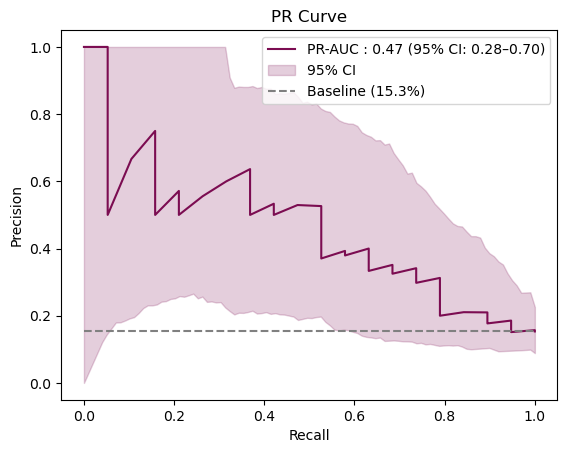

In [66]:
plt.figure()
plt.plot(recall, precision, label=f"PR-AUC : {pr_auc:.2f} (95% CI: {pr_lower:.2f}–{pr_upper:.2f})", color="#7b0c51")
plt.fill_between(recall_grid, prec_lower, prec_upper, color="#7b0c51", alpha=0.2, label="95% CI")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")

event_rate = y_true.mean()
plt.hlines(event_rate, 0, 1, linestyles="dashed", colors="gray",
           label=f"Baseline ({event_rate*100:.1f}%)")
plt.legend()

plt.savefig("PR.svg", format="svg", dpi=300)
plt.show()

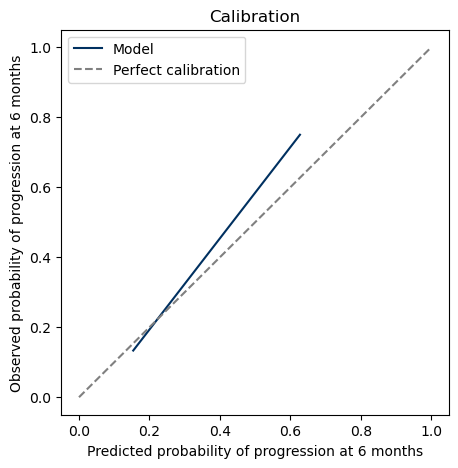

In [67]:
from sklearn.calibration import calibration_curve
true_prob, pred_prob = calibration_curve(
    y_true,
    y_score,
    n_bins=2,
    #strategy="quantile"
)
plt.figure(figsize=(5, 5))

plt.plot(pred_prob, true_prob, linestyle='-', label="Model", color="#003060")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfect calibration")

plt.xlabel("Predicted probability of progression at 6 months")
plt.ylabel("Observed probability of progression at 6 months")
plt.title("Calibration")
plt.legend()
plt.grid(False)

plt.savefig("Calibration_6months.svg", format="svg", dpi=300)
plt.show()


In [284]:
true_prob, pred_prob = calibration_curve(
    y_true,
    y_score,
    n_bins=2
)

n_bootstraps = 1000
rng = np.random.default_rng(42)

# griglia comune sul rischio predetto
pred_grid = np.linspace(pred_prob.min(), pred_prob.max(), 100)

boot_curves = []

for _ in range(n_bootstraps):
    idx = rng.choice(len(y_true), size=len(y_true), replace=True)

    # evita bootstrap degeneri
    if len(np.unique(y_true[idx])) < 2:
        continue

    tp_b, pp_b = calibration_curve(
        y_true[idx],
        y_score[idx],
        n_bins=2
    )

    # interpola sulla griglia comune
    tp_interp = np.interp(pred_grid, pp_b, tp_b)
    boot_curves.append(tp_interp)

boot_curves = np.array(boot_curves)

# CI pointwise
lower = np.percentile(boot_curves, 2.5, axis=0)
upper = np.percentile(boot_curves, 97.5, axis=0)


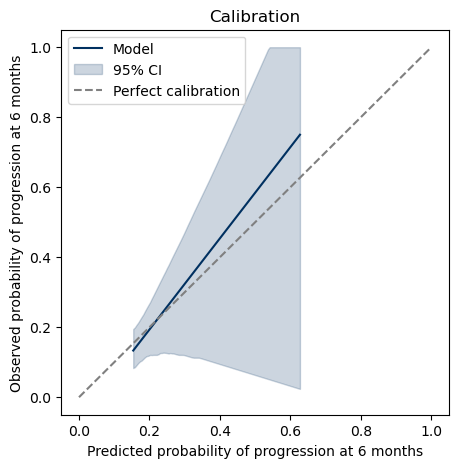

In [285]:
plt.figure(figsize=(5, 5))

# curva principale
plt.plot(pred_prob, true_prob,
         linestyle='-', 
         label="Model", color="#003060")

# CI
plt.fill_between(pred_grid, lower, upper,
                 color="#003060", alpha=0.2,
                 label="95% CI")

# diagonale perfetta
plt.plot([0, 1], [0, 1],
         linestyle="--", color="gray",
         label="Perfect calibration")

plt.xlabel("Predicted probability of progression at 6 months")
plt.ylabel("Observed probability of progression at 6 months")
plt.title("Calibration")
plt.legend()
plt.grid(False)

plt.savefig("Calibration_6months_CI.svg", format="svg", dpi=300)
plt.show()


#### Decision curve

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Binary outcome and predicted risk
y_true = y_true_binary.astype(int)     # 0/1
y_risk = 1 - surv_at_6_months[valid_indices]  # predicted risk at 6 months

N = len(y_true)

In [69]:
def net_benefit(y_true, y_risk, threshold):
    treat = y_risk >= threshold
    TP = np.sum((treat == 1) & (y_true == 1))
    FP = np.sum((treat == 1) & (y_true == 0))
    return (TP / N) - (FP / N) * (threshold / (1 - threshold))

thresholds = np.linspace(0.01, 0.99, 50)

nb_model = np.array([net_benefit(y_true, y_risk, t) for t in thresholds])

event_rate = y_true.mean()
nb_all = event_rate - (1 - event_rate) * (thresholds / (1 - thresholds))

nb_none = np.zeros_like(thresholds)

n_bootstraps = 1000
rng = np.random.default_rng(42)

nb_bootstrap = []

for _ in range(n_bootstraps):
    idx = rng.choice(N, size=N, replace=True)
    if len(np.unique(y_true[idx])) < 2:
        continue
    nb_i = [net_benefit(y_true[idx], y_risk[idx], t) for t in thresholds]
    nb_bootstrap.append(nb_i)

nb_bootstrap = np.array(nb_bootstrap)

nb_lower = np.percentile(nb_bootstrap, 2.5, axis=0)
nb_upper = np.percentile(nb_bootstrap, 97.5, axis=0)

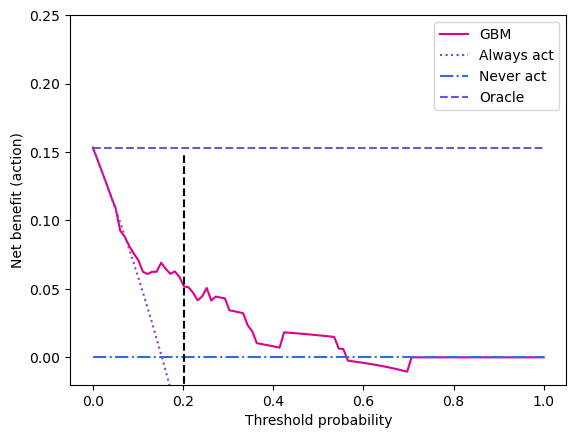

In [73]:
from statkit.decision import NetBenefitDisplay
import matplotlib.pyplot as plt

# Plot the net benefit display
y_test = y_true.squeeze()
y_test_prob = y_risk

display = NetBenefitDisplay.from_predictions(
    y_test, y_test_prob, name='GBM', show_references=True
)

ax = plt.gca()

# CI overlay
#ax.fill_between(thresholds, nb_lower, nb_upper, color='#DF0087', alpha=0.2, label='95% CI')

# Create a mapping of label names to new colors
color_map = {
    'GBM': '#DF0087',
    'Always act': '#8740C3',
    'Never act': '#3369E8',
    'Oracle': '#6757D9',
    'Best Threshold': 'black'
}

#['', '','','','','#008AFB', '#FF004C']
# Loop through the lines and change colors based on the label
for line in ax.get_lines():
    label = line.get_label()
    if label in color_map:
        line.set_color(color_map[label])

# Update the legend to reflect the new colors
handles, labels = ax.get_legend_handles_labels()

# Re-create the legend with the updated colors
new_handles = []
for handle, label in zip(handles, labels):
    if label in color_map:
        handle.set_color(color_map[label])
    new_handles.append(handle)

ax.legend(handles=new_handles, labels=labels)

# Set borders (spines) to black
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Final plot settings
plt.grid(False)
plt.vlines(x=best_t, ymin=-1, ymax=0.15, linestyle='--', color='black', label='Best Threshold')

plt.ylim([-0.02, 0.25])

plt.savefig("Decision_Curve_6months.svg", format="svg", dpi=300)
plt.show()